In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import datetime

In [380]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['grid.color'] = 'black'

## LOAD DATA

In [13]:
macro_df = pd.read_csv('./macro.csv')

In [14]:
train_df = pd.read_csv('./train.csv')

In [207]:
test_df = pd.read_csv('./test.csv')

In [215]:
all_sale_times = pd.concat([train_df[['timestamp']],test_df[['timestamp']]],axis=0).reset_index()

In [216]:
all_sale_times.shape

(38133, 2)

In [218]:
all_sale_times.head()

,index,timestamp
0,0,2011-08-20
1,1,2011-08-23
2,2,2011-08-27
3,3,2011-09-01
4,4,2011-09-05


## EXAMINE CONTENTS OF TEST DATA

In [328]:
test_df.timestamp.head()

0    2015-07-01
1    2015-07-01
2    2015-07-01
3    2015-07-01
4    2015-07-01
Name: timestamp, dtype: object

In [329]:
#convert timestamp values to datetime
test_df['datetime'] = pd.to_datetime(test_df.timestamp)

In [330]:
test_df.datetime.describe()

count                    7662
unique                    274
top       2016-01-25 00:00:00
freq                       80
first     2015-07-01 00:00:00
last      2016-05-30 00:00:00
Name: datetime, dtype: object

In [331]:
#check that there is datetime value for each day between the first and last day in the test dataset
lastday = datetime.date(2016,5,30)
firstday = datetime.date(2015,7,1)
delta = lastday - firstday
print delta.days + 1

335


<font color=red> Test sale data has gaps (274 out of 335 total days have a sale). </font>

## EXAMINE CONTENTS OF MACRO DATA

In [15]:
macro_df.shape

(2484, 100)

In [16]:
macro_df.columns

Index([u'timestamp', u'oil_urals', u'gdp_quart', u'gdp_quart_growth', u'cpi',
       u'ppi', u'gdp_deflator', u'balance_trade', u'balance_trade_growth',
       u'usdrub', u'eurrub', u'brent', u'net_capital_export', u'gdp_annual',
       u'gdp_annual_growth', u'average_provision_of_build_contract',
       u'average_provision_of_build_contract_moscow', u'rts', u'micex',
       u'micex_rgbi_tr', u'micex_cbi_tr', u'deposits_value',
       u'deposits_growth', u'deposits_rate', u'mortgage_value',
       u'mortgage_growth', u'mortgage_rate', u'grp', u'grp_growth',
       u'income_per_cap', u'real_dispos_income_per_cap_growth', u'salary',
       u'salary_growth', u'fixed_basket', u'retail_trade_turnover',
       u'retail_trade_turnover_per_cap', u'retail_trade_turnover_growth',
       u'labor_force', u'unemployment', u'employment',
       u'invest_fixed_capital_per_cap', u'invest_fixed_assets',
       u'profitable_enterpr_share', u'unprofitable_enterpr_share',
       u'share_own_revenues', u'o

#### INVESTIGATE TIMESTAMP COLUMN AND CONVERT TO DATETIME

In [180]:
macro_df.timestamp.head()

0    2010-01-01
1    2010-01-02
2    2010-01-03
3    2010-01-04
4    2010-01-05
Name: timestamp, dtype: object

In [181]:
#convert timestamp values to datetime
macro_df['datetime'] = pd.to_datetime(macro_df.timestamp)

In [182]:
macro_df.datetime.describe()

count                    2484
unique                   2484
top       2015-10-18 00:00:00
freq                        1
first     2010-01-01 00:00:00
last      2016-10-19 00:00:00
Name: datetime, dtype: object

In [191]:
#check that there is datetime value for each day between the first and last day in the macro dataset
lastday = datetime.date(2016,10,19)
firstday = datetime.date(2010,1,1)
delta = lastday - firstday
print delta.days + 1

2484


<font color=red> Macro data does not have gaps in dates.  It also spans a longer period than the period for train and test data (Jan 2010 through Oct 2016 for Macro vs. Aug 2011 through May 2016 for train/test data. </font>

#### CHECK FOR PRESENCE OF MISSING VALUES

In [321]:
#658 missing: data only from 1/1/2010 through 12/31/2014: 1826 days

In [120]:
miss_vls_macro = pd.DataFrame(macro_df.isnull().sum(axis=0).sort_values(ascending=False), columns=['Count'])
miss_vls_macro['Percent'] = miss_vls_macro['Count'].apply(lambda x: '{:.2f}%'.format((float(x) / macro_df.shape[0]) * 100))
miss_vls_macro[miss_vls_macro.Count > 0]

,Count,Percent
provision_retail_space_modern_sqm,1754,70.61%
provision_retail_space_sqm,1753,70.57%
old_education_build_share,1389,55.92%
modern_education_share,1389,55.92%
theaters_viewers_per_1000_cap,1023,41.18%
hospital_beds_available_per_cap,1023,41.18%
hospital_bed_occupancy_per_year,1023,41.18%
grp_growth,1023,41.18%
museum_visitis_per_100_cap,1023,41.18%
population_reg_sports_share,1023,41.18%


In [193]:
#IDENTIFY FEATURES WITHOUT ANY MISSING VALUES
miss_vls_macro[miss_vls_macro.Count == 0]

,Count,Percent
gdp_annual_growth,0,0.00%
gdp_annual,0,0.00%
average_provision_of_build_contract,0,0.00%
deposits_value,0,0.00%
mortgage_value,0,0.00%
mortgage_rate,0,0.00%
fixed_basket,0,0.00%
oil_urals,0,0.00%
timestamp,0,0.00%


In [222]:
#create DF with average daily prices
train_prices_by_day = train_df.groupby('timestamp')['price_doc'].mean().reset_index()

In [227]:
train_prices_by_day.shape

(1161, 2)

In [228]:
train_prices_by_day['datetime'] = pd.to_datetime(train_prices_by_day.timestamp)

In [232]:
train_prices_by_day.drop('timestamp',axis=1,inplace=True)

In [233]:
train_prices_by_day.head()

,price_doc,datetime
0,5850000,2011-08-20
1,6000000,2011-08-23
2,5700000,2011-08-27
3,13100000,2011-09-01
4,16331452,2011-09-05


In [238]:
#merge average daily prices onto macro DF
macro_df = pd.merge(macro_df,train_prices_by_day,how='left',on='datetime')

In [239]:
macro_df.price_doc.isnull().sum()

1323

In [284]:
#convert all MACRO features to monthly median values (price is median of daily averages)
macro_df_monthly = macro_df.groupby(macro_df.datetime.apply(lambda x: x.to_period('M'))).median()

In [335]:
#convert all TRAIN features to monthly median values (price is median of all prices in the month)
macro_df_monthly2 = train_df.groupby(train_df.datetime.apply(lambda x: x.to_period('M'))).median()

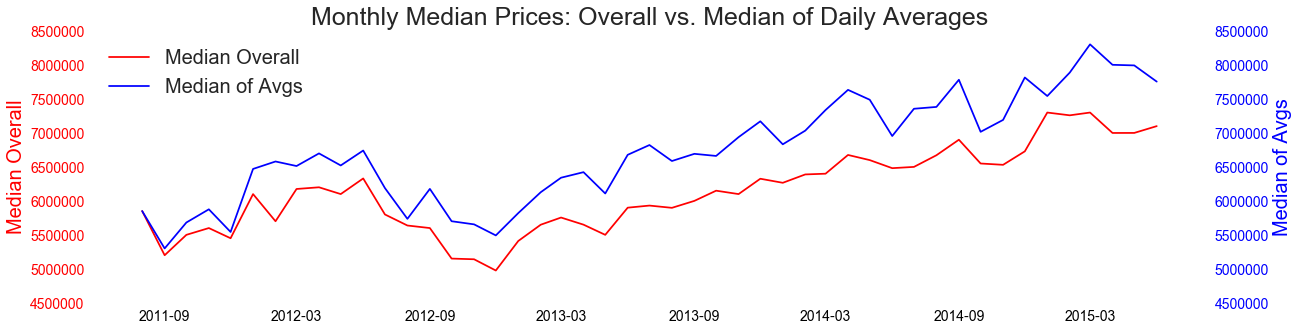

In [343]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(macro_df_monthly2.index.to_timestamp(), macro_df_monthly2.price_doc,'r', label = 'Median Overall')
ax1.set_ylabel("Median Overall", color='r', fontsize=20)
ax1.set_ylim(4500000,8500000)
ax1.tick_params(axis='y', colors= 'r', labelsize=14)
ax1.tick_params(axis='x', colors= 'k', labelsize=14)

ax2.plot(macro_df_monthly.index.to_timestamp(), macro_df_monthly.price_doc, 'b', label = 'Median of Avgs')
ax2.set_ylabel("Median of Avgs", color='b', fontsize=20)
ax2.set_ylim(4500000,8500000)
ax2.tick_params(axis='y', colors= 'b', labelsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2, fontsize=20)

ax1.grid(b=False)
ax2.grid(b=False)

plt.title("Monthly Median Prices: Overall vs. Median of Daily Averages", fontsize=25)
plt.show()

<font color=red>The two plots below show that features with same rate of missing values may cover different periods. </font>

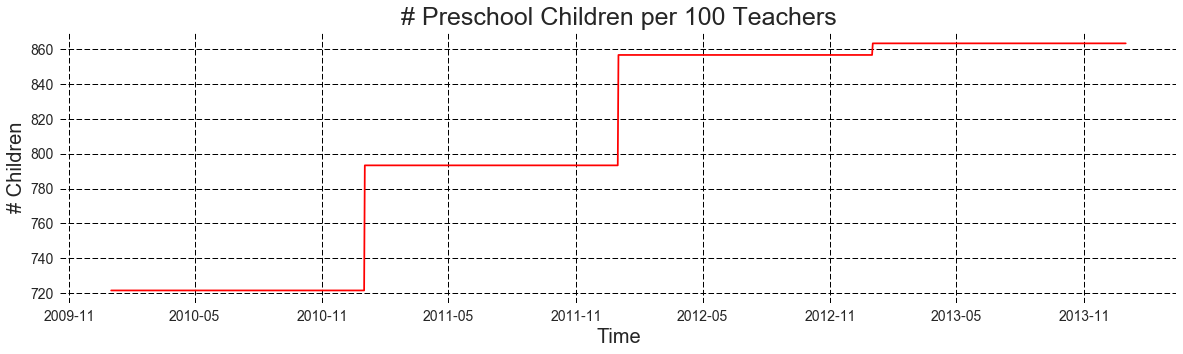

In [334]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.load_of_teachers_preschool_per_teacher,'r')
plt.title("# Preschool Children per 100 Teachers", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('# Children', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

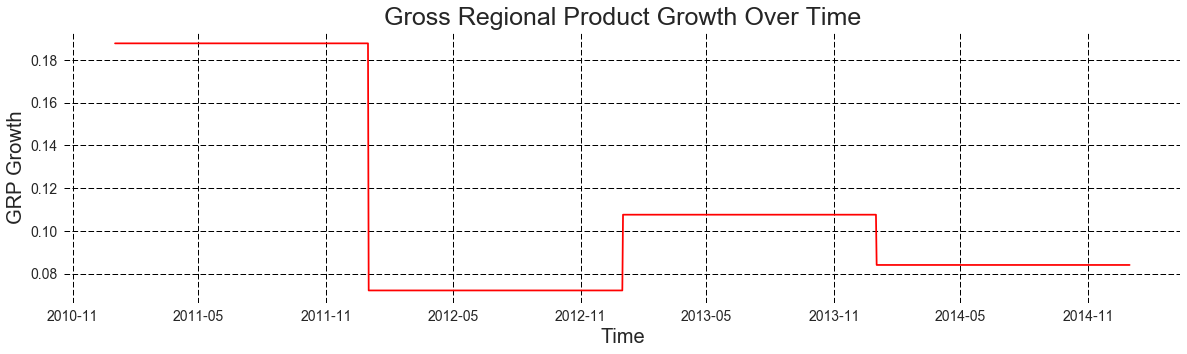

In [345]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.grp_growth,'r')
plt.title("Gross Regional Product Growth Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('GRP Growth', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

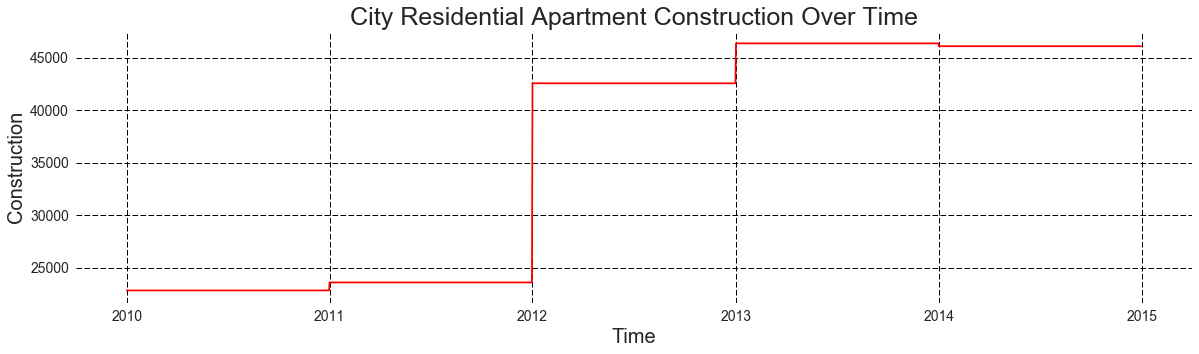

In [381]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.apartment_build,'r')
plt.title("City Residential Apartment Construction Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Construction', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

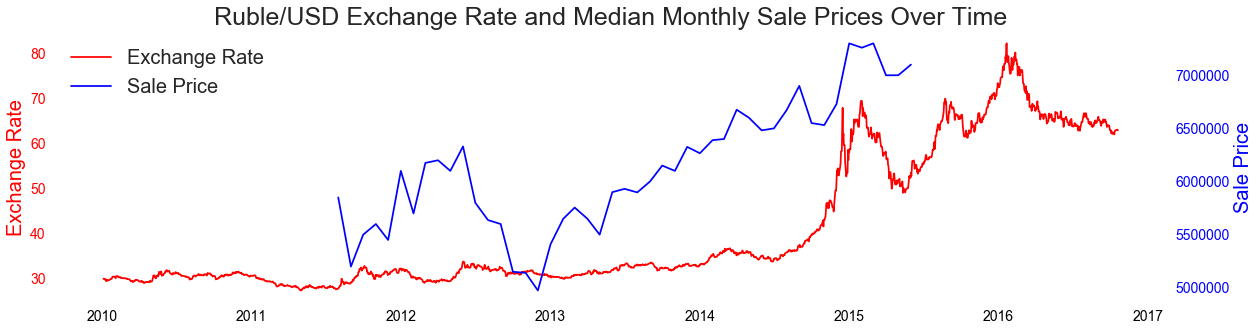

In [350]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(macro_df.datetime, macro_df.usdrub,'r', label = 'Exchange Rate')
ax1.set_ylabel("Exchange Rate", color='r', fontsize=20)
ax1.tick_params(axis='y', colors= 'r', labelsize=14)
ax1.tick_params(axis='x', colors= 'k', labelsize=14)

ax2.plot(macro_df_monthly2.index.to_timestamp(), macro_df_monthly2.price_doc, 'b', label = 'Sale Price')
ax2.set_ylabel("Sale Price", color='b', fontsize=20)
ax2.tick_params(axis='y', colors= 'b', labelsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2, fontsize=20)

ax1.grid(b=False)
ax2.grid(b=False)

plt.title("Ruble/USD Exchange Rate and Median Monthly Sale Prices Over Time", fontsize=25)
plt.show()

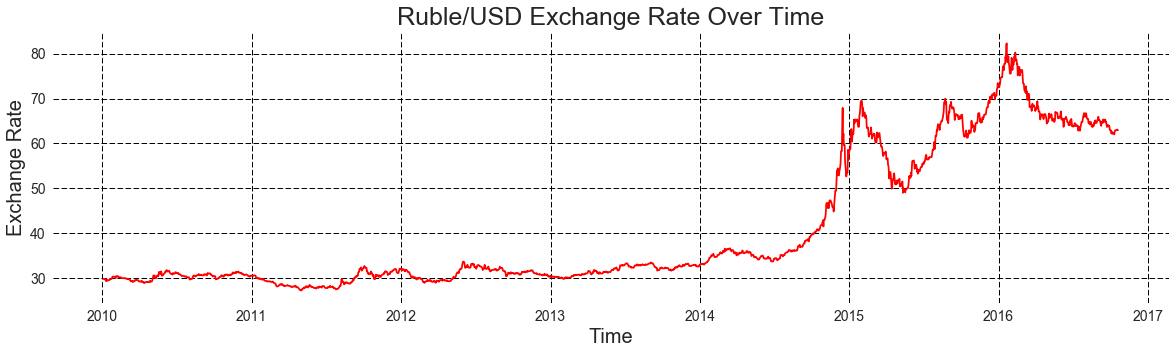

In [301]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.usdrub,'r')
plt.title("Ruble/USD Exchange Rate Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Exchange Rate', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

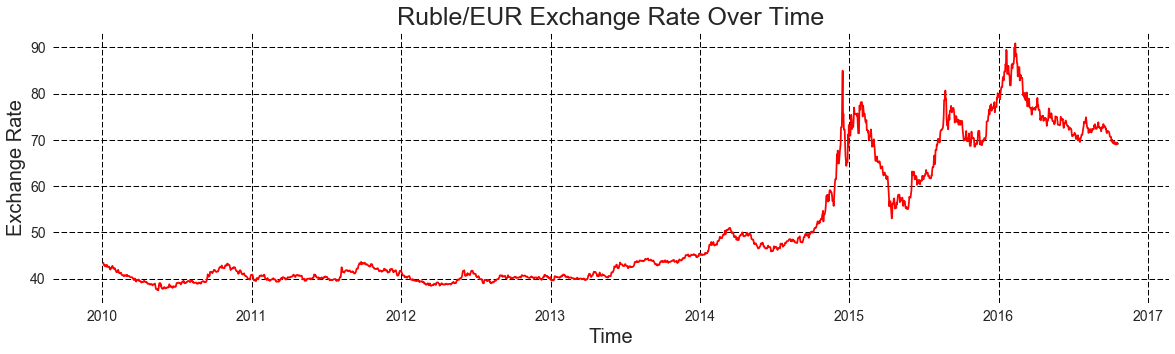

In [304]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.eurrub,'r')
plt.title("Ruble/EUR Exchange Rate Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Exchange Rate', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

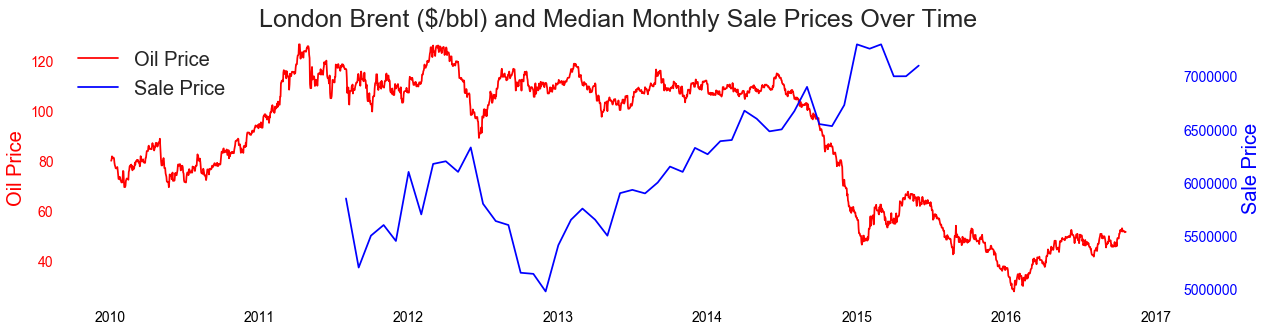

In [349]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(macro_df.datetime, macro_df.brent,'r', label = 'Oil Price')
ax1.set_ylabel("Oil Price", color='r', fontsize=20)
ax1.tick_params(axis='y', colors= 'r', labelsize=14)
ax1.tick_params(axis='x', colors= 'k', labelsize=14)

ax2.plot(macro_df_monthly2.index.to_timestamp(), macro_df_monthly2.price_doc, 'b', label = 'Sale Price')
ax2.set_ylabel("Sale Price", color='b', fontsize=20)
ax2.tick_params(axis='y', colors= 'b', labelsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2, fontsize=20)

ax1.grid(b=False)
ax2.grid(b=False)

plt.title("London Brent ($/bbl) and Median Monthly Sale Prices Over Time", fontsize=25)
plt.show()

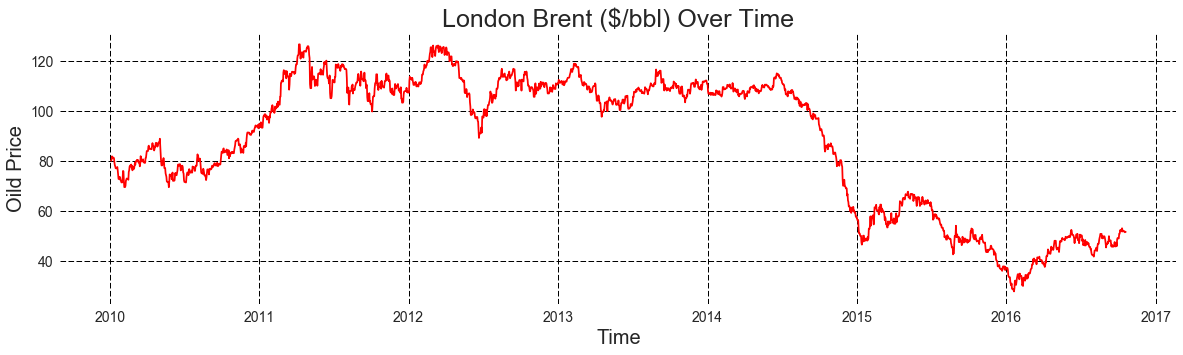

In [305]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.brent,'r')
plt.title("London Brent ($/bbl) Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Oild Price', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

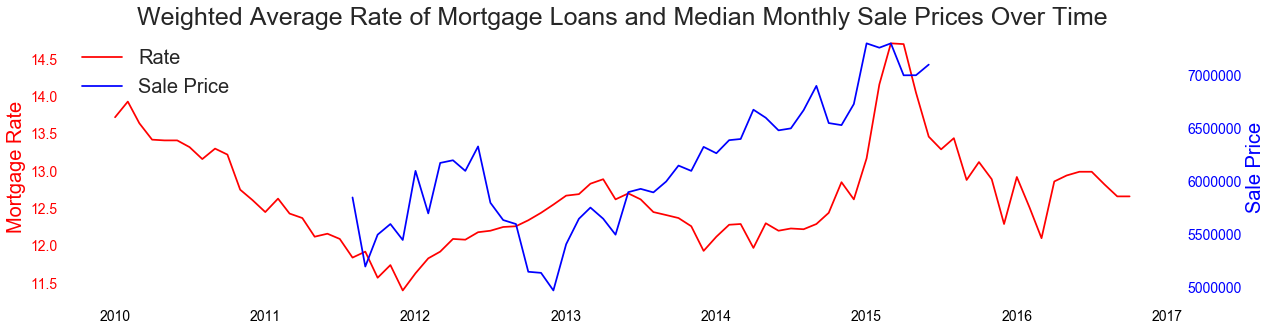

In [397]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(macro_df_monthly.index.to_timestamp(), macro_df_monthly.mortgage_rate,'r', label = 'Rate')
#ax1.plot(macro_df.datetime, macro_df.mortgage_rate,'r', label = 'Rate')
ax1.set_ylabel("Mortgage Rate", color='r', fontsize=20)
ax1.tick_params(axis='y', colors= 'r', labelsize=14)
ax1.tick_params(axis='x', colors= 'k', labelsize=14)
ax1.set_frame_on(True)

ax2.plot(macro_df_monthly2.index.to_timestamp(), macro_df_monthly2.price_doc, 'b', label = 'Sale Price')
ax2.set_ylabel("Sale Price", color='b', fontsize=20)
ax2.tick_params(axis='y', colors= 'b', labelsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2, fontsize=20)

ax1.grid(b=False)
ax2.grid(b=False)

plt.title("Weighted Average Rate of Mortgage Loans and Median Monthly Sale Prices Over Time", fontsize=25)
plt.show()

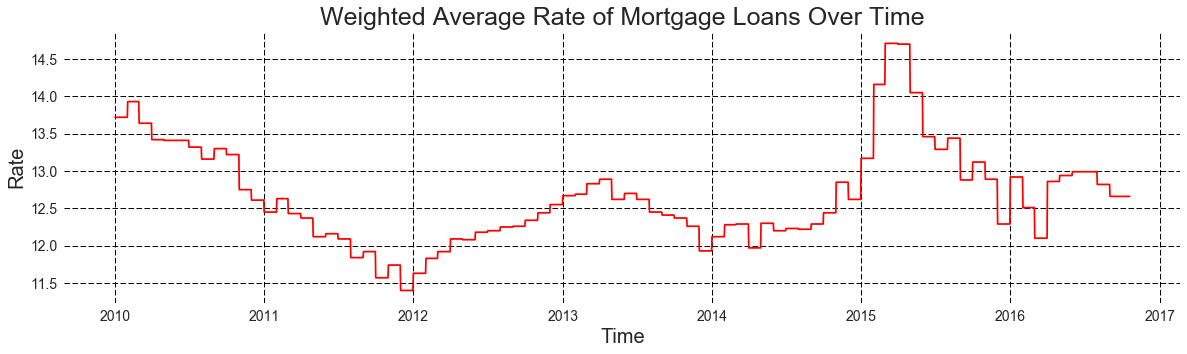

In [246]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.mortgage_rate,'r')
plt.title("Weighted Average Rate of Mortgage Loans Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Rate', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

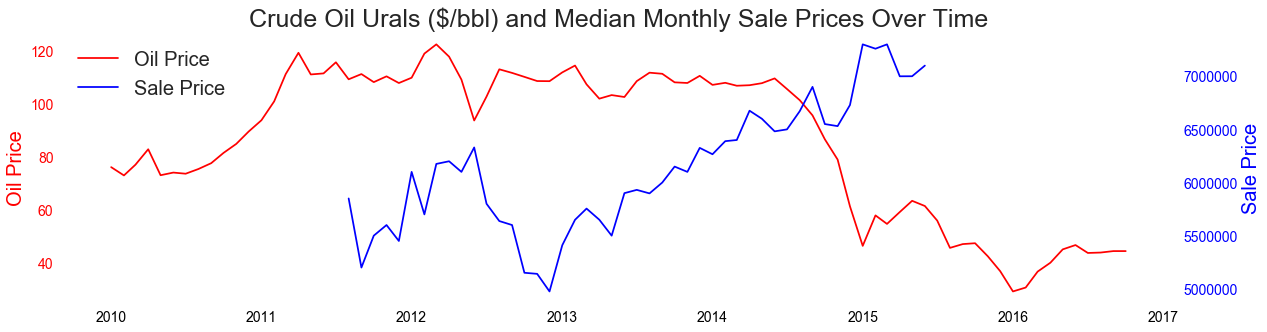

In [399]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(macro_df_monthly.index.to_timestamp(), macro_df_monthly.oil_urals,'r', label = 'Oil Price')
#ax1.plot(macro_df.datetime, macro_df.oil_urals,'r', label = 'Oil Price')
ax1.set_ylabel("Oil Price", color='r', fontsize=20)
ax1.tick_params(axis='y', colors= 'r', labelsize=14)
ax1.tick_params(axis='x', colors= 'k', labelsize=14)

ax2.plot(macro_df_monthly2.index.to_timestamp(), macro_df_monthly2.price_doc, 'b', label = 'Sale Price')
ax2.set_ylabel("Sale Price", color='b', fontsize=20)
ax2.tick_params(axis='y', colors= 'b', labelsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2, fontsize=20)

ax1.grid(b=False)
ax2.grid(b=False)

plt.title("Crude Oil Urals ($/bbl) and Median Monthly Sale Prices Over Time", fontsize=25)
plt.show()

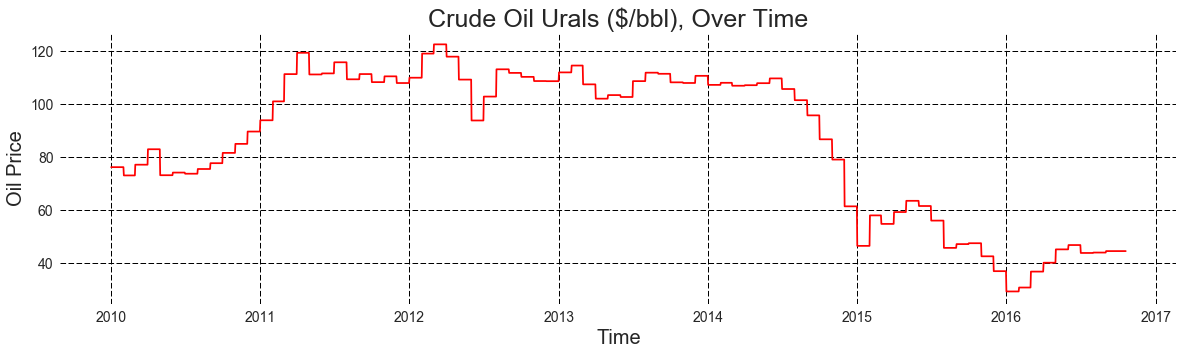

In [213]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.oil_urals, 'r')
plt.title("Crude Oil Urals ($/bbl), Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Oil Price', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_frame_on(True)
plt.show()

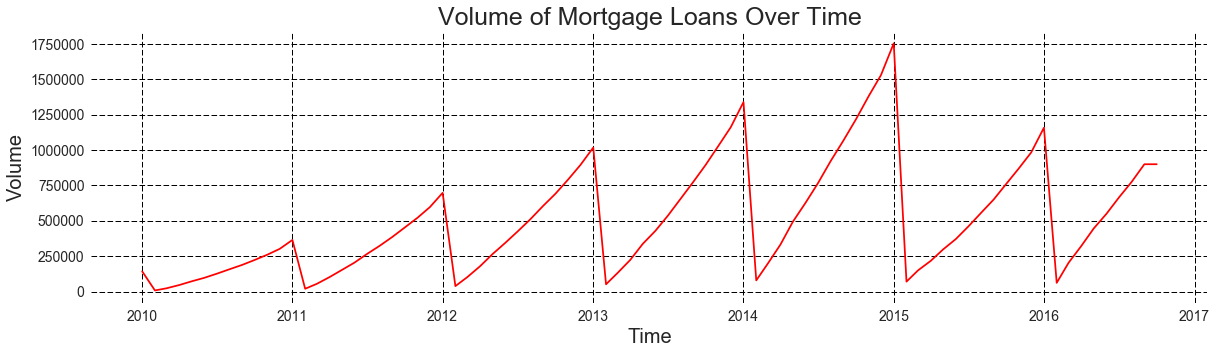

In [400]:
plt.figure(figsize=(20,5))
#plt.plot(macro_df.datetime, macro_df.mortgage_value, 'r')
plt.plot(macro_df_monthly.index.to_timestamp(), macro_df_monthly.mortgage_value,'r')
plt.title("Volume of Mortgage Loans Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

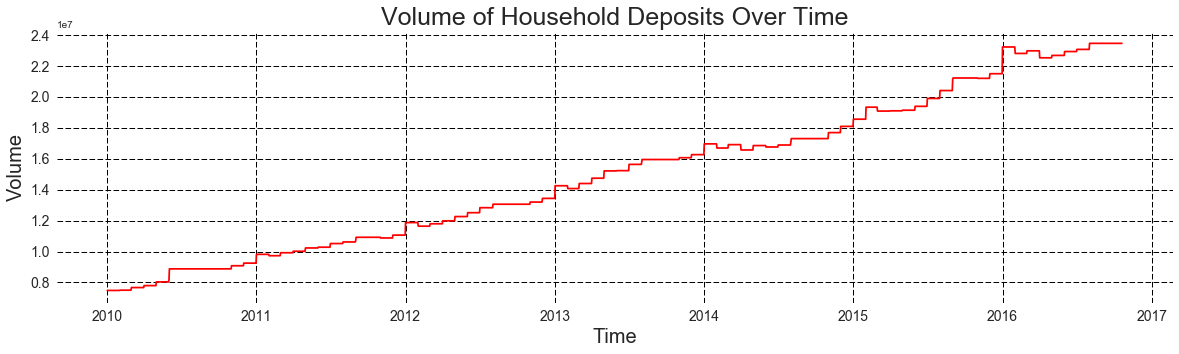

In [210]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.deposits_value, 'r')
plt.title("Volume of Household Deposits Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

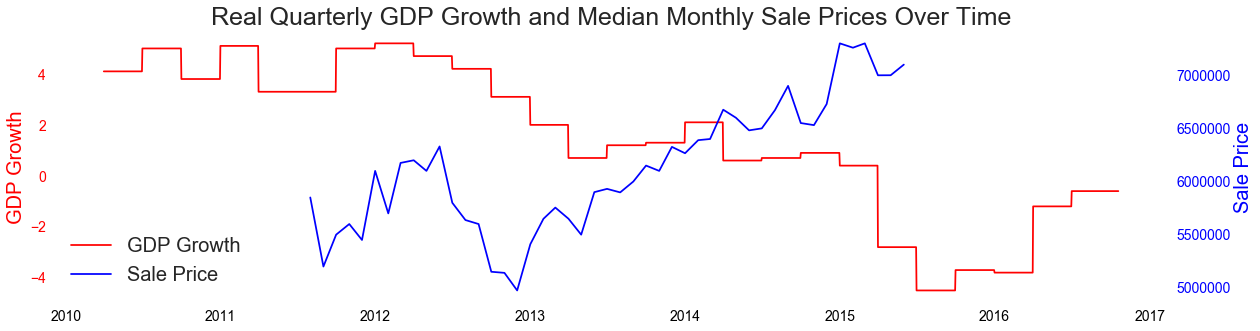

In [353]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(macro_df.datetime, macro_df.gdp_quart_growth,'r', label = 'GDP Growth')
ax1.set_ylabel("GDP Growth", color='r', fontsize=20)
ax1.tick_params(axis='y', colors= 'r', labelsize=14)
ax1.tick_params(axis='x', colors= 'k', labelsize=14)

ax2.plot(macro_df_monthly2.index.to_timestamp(), macro_df_monthly2.price_doc, 'b', label = 'Sale Price')
ax2.set_ylabel("Sale Price", color='b', fontsize=20)
ax2.tick_params(axis='y', colors= 'b', labelsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=3, fontsize=20)

ax1.grid(b=False)
ax2.grid(b=False)

plt.title("Real Quarterly GDP Growth and Median Monthly Sale Prices Over Time", fontsize=25)
plt.show()

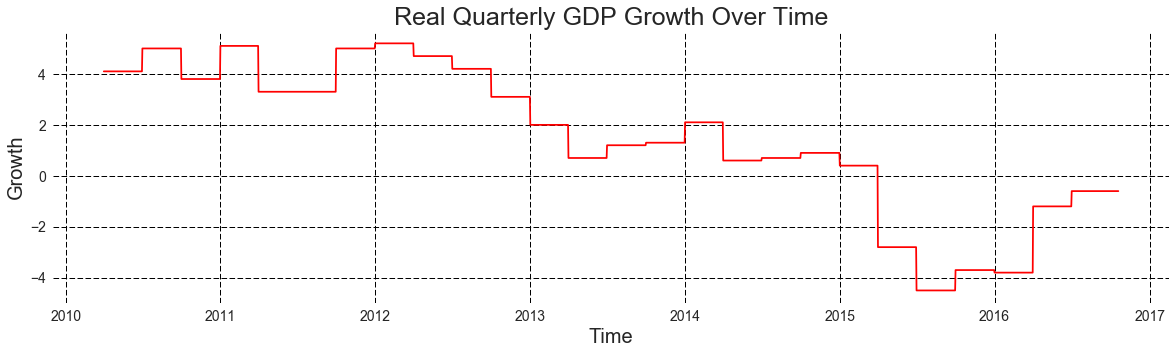

In [308]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.gdp_quart_growth, 'r')
plt.title("Real Quarterly GDP Growth Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Growth', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

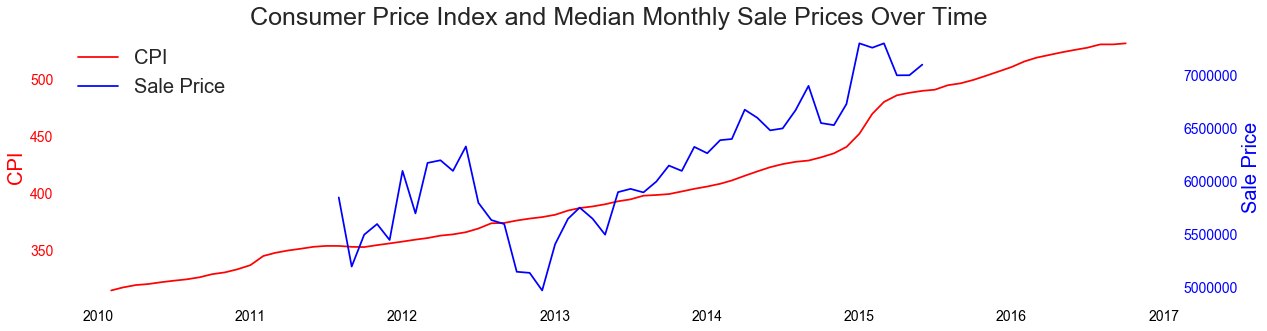

In [354]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(macro_df_monthly.index.to_timestamp(), macro_df_monthly.cpi,'r', label = 'CPI')
ax1.set_ylabel("CPI", color='r', fontsize=20)
ax1.tick_params(axis='y', colors= 'r', labelsize=14)
ax1.tick_params(axis='x', colors= 'k', labelsize=14)

ax2.plot(macro_df_monthly2.index.to_timestamp(), macro_df_monthly2.price_doc, 'b', label = 'Sale Price')
ax2.set_ylabel("Sale Price", color='b', fontsize=20)
ax2.tick_params(axis='y', colors= 'b', labelsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2, fontsize=20)

ax1.grid(b=False)
ax2.grid(b=False)

plt.title("Consumer Price Index and Median Monthly Sale Prices Over Time", fontsize=25)
plt.show()

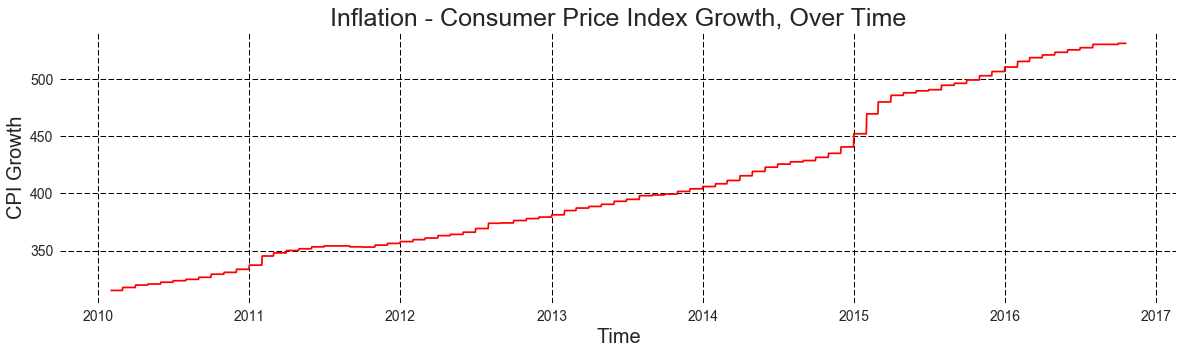

In [212]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.cpi, 'r')
plt.title("Inflation - Consumer Price Index Growth, Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('CPI Growth', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

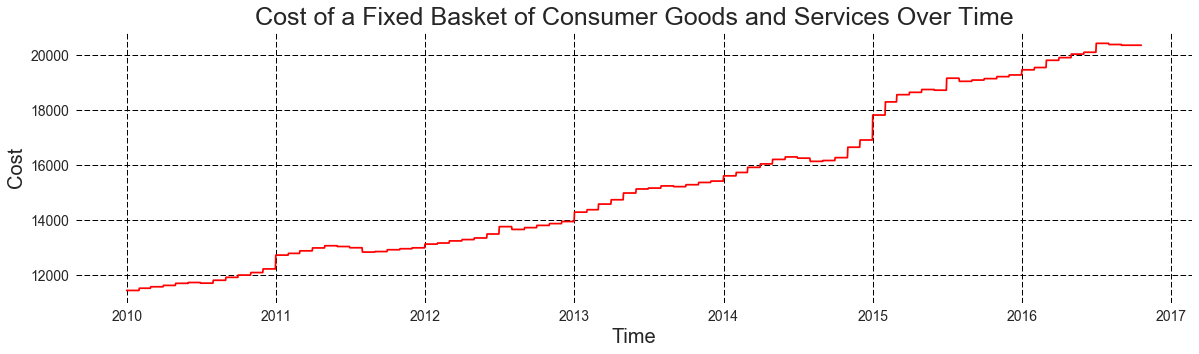

In [300]:
plt.figure(figsize=(20,5))
plt.plot(macro_df.datetime, macro_df.fixed_basket,'r')
plt.title("Cost of a Fixed Basket of Consumer Goods and Services Over Time", fontsize=25)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Cost', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

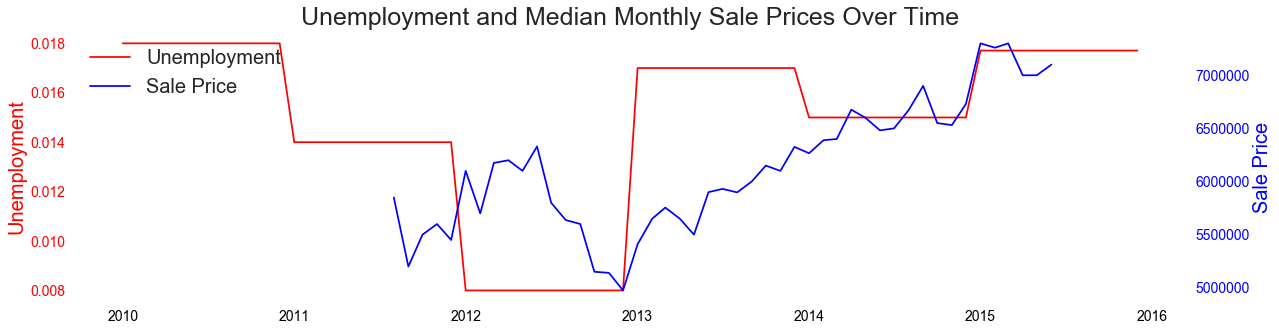

In [402]:
fig, ax1 = plt.subplots(figsize=(20,5))
ax2 = ax1.twinx()

ax1.plot(macro_df_monthly.index.to_timestamp(), macro_df_monthly.unemployment,'r', label = 'Unemployment')
ax1.set_ylabel("Unemployment", color='r', fontsize=20)
ax1.tick_params(axis='y', colors= 'r', labelsize=14)
ax1.tick_params(axis='x', colors= 'k', labelsize=14)

ax2.plot(macro_df_monthly2.index.to_timestamp(), macro_df_monthly2.price_doc, 'b', label = 'Sale Price')
ax2.set_ylabel("Sale Price", color='b', fontsize=20)
ax2.tick_params(axis='y', colors= 'b', labelsize=14)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=2, fontsize=20)

ax1.grid(b=False)
ax2.grid(b=False)

plt.title("Unemployment and Median Monthly Sale Prices Over Time", fontsize=25)
plt.show()

## EXAMINE CONTENTS OF TRAIN DATA

In [17]:
train_df.shape

(30471, 292)

In [38]:
train_df.dtypes

id                                         int64
timestamp                                 object
full_sq                                    int64
life_sq                                  float64
floor                                    float64
max_floor                                float64
material                                 float64
build_year                               float64
num_room                                 float64
kitch_sq                                 float64
state                                    float64
product_type                              object
sub_area                                  object
area_m                                   float64
raion_popul                                int64
green_zone_part                          float64
indust_part                              float64
children_preschool                         int64
preschool_quota                          float64
preschool_education_centers_raion          int64
children_school     

In [18]:
train_df.columns.tolist()[0:100]

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

In [19]:
train_df.columns.tolist()[100:200]

['railroad_station_avto_km',
 'railroad_station_avto_min',
 'ID_railroad_station_avto',
 'public_transport_station_km',
 'public_transport_station_min_walk',
 'water_km',
 'water_1line',
 'mkad_km',
 'ttk_km',
 'sadovoe_km',
 'bulvar_ring_km',
 'kremlin_km',
 'big_road1_km',
 'ID_big_road1',
 'big_road1_1line',
 'big_road2_km',
 'ID_big_road2',
 'railroad_km',
 'railroad_1line',
 'zd_vokzaly_avto_km',
 'ID_railroad_terminal',
 'bus_terminal_avto_km',
 'ID_bus_terminal',
 'oil_chemistry_km',
 'nuclear_reactor_km',
 'radiation_km',
 'power_transmission_line_km',
 'thermal_power_plant_km',
 'ts_km',
 'big_market_km',
 'market_shop_km',
 'fitness_km',
 'swim_pool_km',
 'ice_rink_km',
 'stadium_km',
 'basketball_km',
 'hospice_morgue_km',
 'detention_facility_km',
 'public_healthcare_km',
 'university_km',
 'workplaces_km',
 'shopping_centers_km',
 'office_km',
 'additional_education_km',
 'preschool_km',
 'big_church_km',
 'church_synagogue_km',
 'mosque_km',
 'theater_km',
 'museum_km',
 

In [20]:
train_df.columns.tolist()[200:]

['prom_part_1500',
 'office_count_1500',
 'office_sqm_1500',
 'trc_count_1500',
 'trc_sqm_1500',
 'cafe_count_1500',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_count_1500_na_price',
 'cafe_count_1500_price_500',
 'cafe_count_1500_price_1000',
 'cafe_count_1500_price_1500',
 'cafe_count_1500_price_2500',
 'cafe_count_1500_price_4000',
 'cafe_count_1500_price_high',
 'big_church_count_1500',
 'church_count_1500',
 'mosque_count_1500',
 'leisure_count_1500',
 'sport_count_1500',
 'market_count_1500',
 'green_part_2000',
 'prom_part_2000',
 'office_count_2000',
 'office_sqm_2000',
 'trc_count_2000',
 'trc_sqm_2000',
 'cafe_count_2000',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_avg_price_2000',
 'cafe_count_2000_na_price',
 'cafe_count_2000_price_500',
 'cafe_count_2000_price_1000',
 'cafe_count_2000_price_1500',
 'cafe_count_2000_price_2500',
 'cafe_count_2000_price_4000',
 'cafe_count_2000_price_high',
 'big_

#### CHECK FOR PRESENCE OF MISSING VALUES

In [23]:
miss_vls = pd.DataFrame(train_df.isnull().sum(axis=0).sort_values(ascending=False), columns=['Count'])
miss_vls['Percent'] = miss_vls['Count'].apply(lambda x: '{:.2f}%'.format((float(x) / train_df.shape[0]) * 100))
miss_vls[miss_vls.Count > 0]

,Count,Percent
hospital_beds_raion,14441,47.39%
build_year,13605,44.65%
state,13559,44.50%
cafe_avg_price_500,13281,43.59%
cafe_sum_500_max_price_avg,13281,43.59%
cafe_sum_500_min_price_avg,13281,43.59%
max_floor,9572,31.41%
material,9572,31.41%
num_room,9572,31.41%
kitch_sq,9572,31.41%


In [403]:
#IDENTIFY FEATURES WITHOUT ANY MISSING VALUES
miss_vls[miss_vls.Count == 0]

,Count,Percent
ID_metro,0,0.00%
metro_min_avto,0,0.00%
industrial_km,0,0.00%
water_treatment_km,0,0.00%
cemetery_km,0,0.00%
incineration_km,0,0.00%
metro_km_avto,0,0.00%
park_km,0,0.00%
school_km,0,0.00%
kindergarten_km,0,0.00%


#### CHECK FOR PRESENCE OF ZERO VALUES

In [41]:
zero_vls = pd.DataFrame(train_df.astype(bool).sum(axis=0).sort_values(ascending=True), columns=['Count'])
zero_vls['Percent'] = zero_vls['Count'].apply(lambda x: '{:.2f}%'.format((train_df.shape[0] - float(x)) / train_df.shape[0] * 100))
zero_vls['Count'] = train_df.shape[0] - zero_vls['Count']
zero_vls[zero_vls.Count > 0]

,Count,Percent
mosque_count_500,30322,99.51%
mosque_count_1000,29887,98.08%
cafe_count_500_price_high,29635,97.26%
mosque_count_1500,29319,96.22%
cafe_count_1000_price_high,29108,95.53%
leisure_count_500,28901,94.85%
cafe_count_500_price_4000,28760,94.38%
culture_objects_top_25_raion,28543,93.67%
cafe_count_1500_price_high,28523,93.61%
cafe_count_2000_price_high,27832,91.34%


#### TRANSACTION ID

In [178]:
print len(train_df.id.unique().tolist())
print train_df.shape[0]

30471
30471


<font color=red> Transaction IDS are unique in train data.</font>

#### PRICE - TARGET

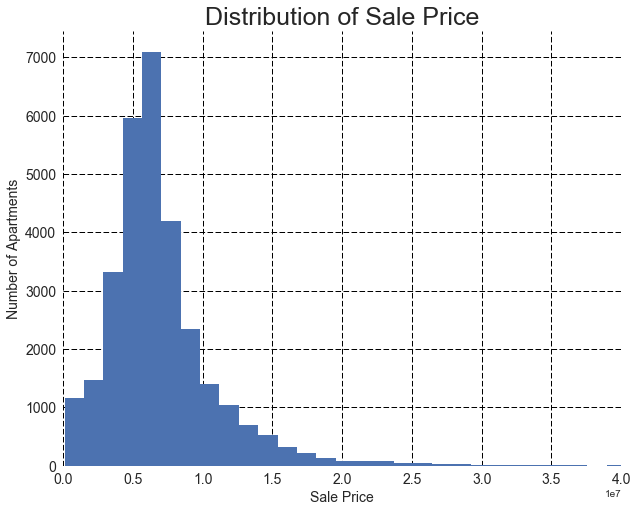

In [245]:
plt.figure(figsize = (10,8))
plt.hist(train_df.price_doc, bins=80)
plt.title("Distribution of Sale Price", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Sale Price", fontsize=14)
#setting an upper bound on values for this plot
plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

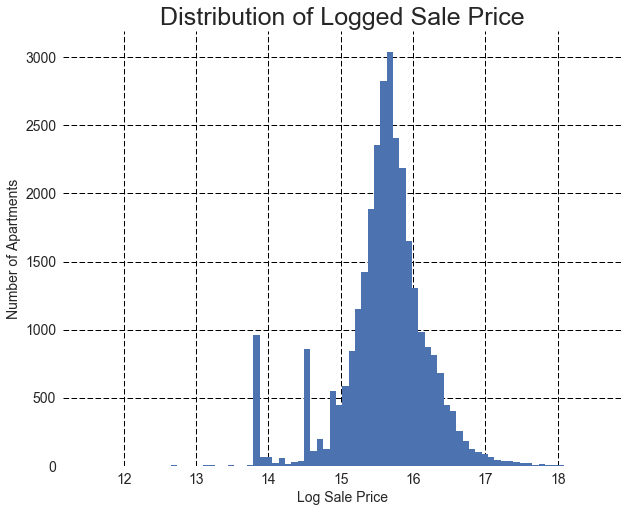

In [109]:
plt.figure(figsize = (10,8))
plt.hist(np.log(train_df.price_doc), bins=80)
plt.title("Distribution of Logged Sale Price", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Log Sale Price", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

#### TIMESTAMP

In [39]:
train_df.timestamp.head()

0    2011-08-20
1    2011-08-23
2    2011-08-27
3    2011-09-01
4    2011-09-05
Name: timestamp, dtype: object

In [42]:
#convert timestamp values to datetime
train_df['datetime'] = pd.to_datetime(train_df.timestamp)

In [43]:
train_df.datetime.describe()

count                   30471
unique                   1161
top       2014-12-16 00:00:00
freq                      160
first     2011-08-20 00:00:00
last      2015-06-30 00:00:00
Name: datetime, dtype: object

In [226]:
lastday = datetime.date(2015,6,30)
firstday = datetime.date(2011,8,20)
delta = lastday - firstday
print delta.days + 1

1411


In [77]:
train_df['transaction_yr'] = train_df.datetime.apply(lambda x: x.year)

In [79]:
train_df.transaction_yr.value_counts(dropna=False)

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: transaction_yr, dtype: int64

#### DISTANCE FEATURES

In [406]:
#check which areas have missing values of distance to metro
train_df[train_df.metro_min_walk.isnull()].sub_area.unique()

array(['Timirjazevskoe', 'Begovoe', 'Vojkovskoe', 'Ochakovo-Matveevskoe',
       'Poselenie Vnukovskoe', 'Krylatskoe'], dtype=object)

In [407]:
#check which areas have missing values of distance to railroad station
train_df[train_df.railroad_station_walk_min.isnull()].sub_area.unique()

array(['Timirjazevskoe', 'Begovoe', 'Vojkovskoe', 'Ochakovo-Matveevskoe',
       'Poselenie Vnukovskoe', 'Krylatskoe'], dtype=object)

In [409]:
areas_wo_dist = train_df[train_df.railroad_station_walk_min.isnull()].sub_area.unique().tolist()
areas_wo_dist

['Timirjazevskoe',
 'Begovoe',
 'Vojkovskoe',
 'Ochakovo-Matveevskoe',
 'Poselenie Vnukovskoe',
 'Krylatskoe']

In [411]:
#check if there are other properties in those areas, so that their values could be used to estimate missing distance values
train_df[train_df.sub_area.isin(areas_wo_dist)].sub_area.value_counts()

Poselenie Vnukovskoe    1372
Ochakovo-Matveevskoe     255
Timirjazevskoe           154
Vojkovskoe               131
Krylatskoe               103
Begovoe                   60
Name: sub_area, dtype: int64

In [416]:
train_df.railroad_station_walk_min.describe()

count    30446.000000
mean        52.643335
std         46.036303
min          0.337833
25%         23.176502
50%         38.826474
75%         61.771704
max        295.836488
Name: railroad_station_walk_min, dtype: float64

In [419]:
train_df.metro_min_walk.describe()

count    30446.000000
mean        42.737601
std         69.303131
min          0.000000
25%         11.484150
50%         20.447209
75%         45.322032
max        711.215806
Name: metro_min_walk, dtype: float64

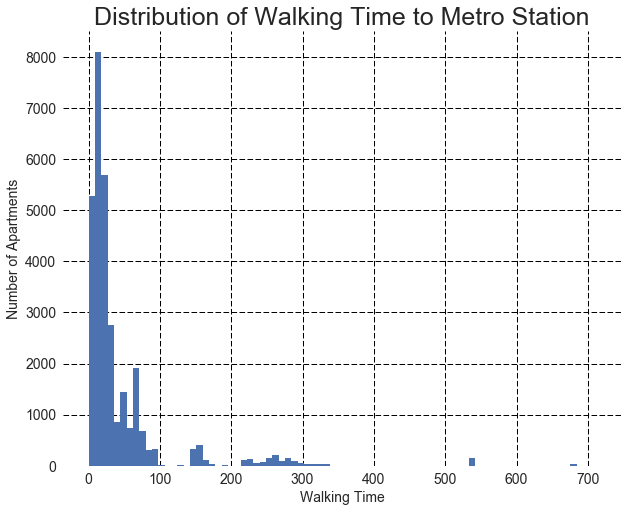

In [420]:
plt.figure(figsize = (10,8))
plt.hist(train_df[train_df.metro_min_walk.notnull()].metro_min_walk, bins=80)
plt.title("Distribution of Walking Time to Metro Station", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Walking Time", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

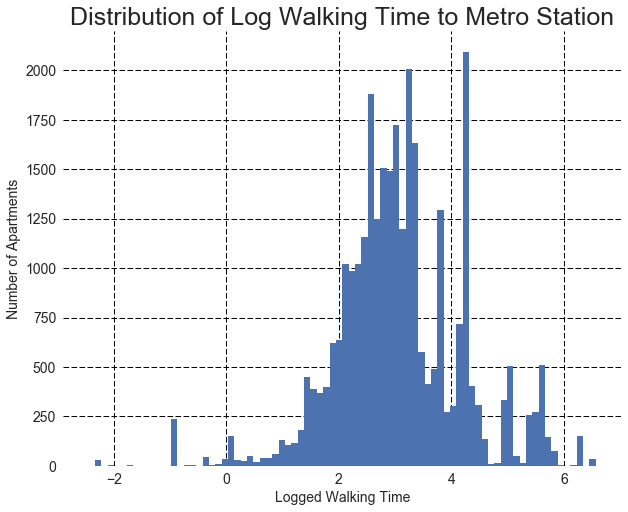

In [425]:
plt.figure(figsize = (10,8))
plt.hist(np.log(train_df[train_df.metro_min_walk > 0].metro_min_walk), bins=80)
plt.title("Distribution of Log Walking Time to Metro Station", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Logged Walking Time", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

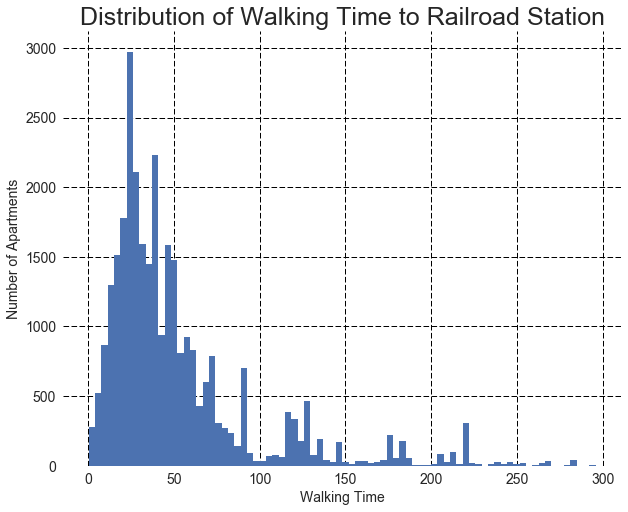

In [421]:
plt.figure(figsize = (10,8))
plt.hist(train_df[train_df.railroad_station_walk_min.notnull()].railroad_station_walk_min, bins=80)
plt.title("Distribution of Walking Time to Railroad Station", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Walking Time", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

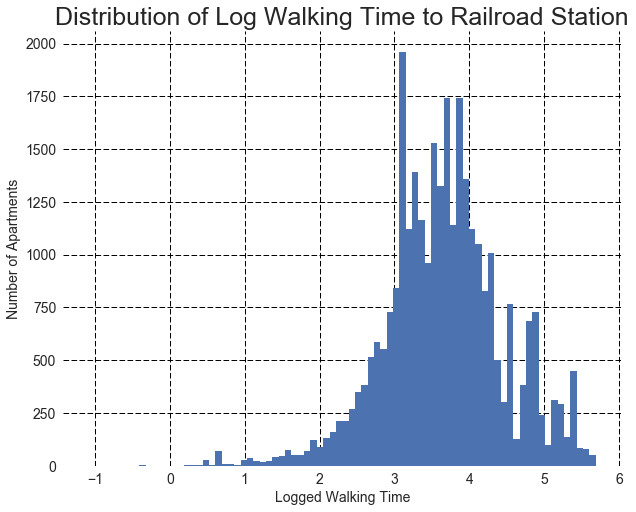

In [426]:
plt.figure(figsize = (10,8))
plt.hist(np.log(train_df[train_df.railroad_station_walk_min > 0].railroad_station_walk_min), bins=80)
plt.title("Distribution of Log Walking Time to Railroad Station", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Logged Walking Time", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

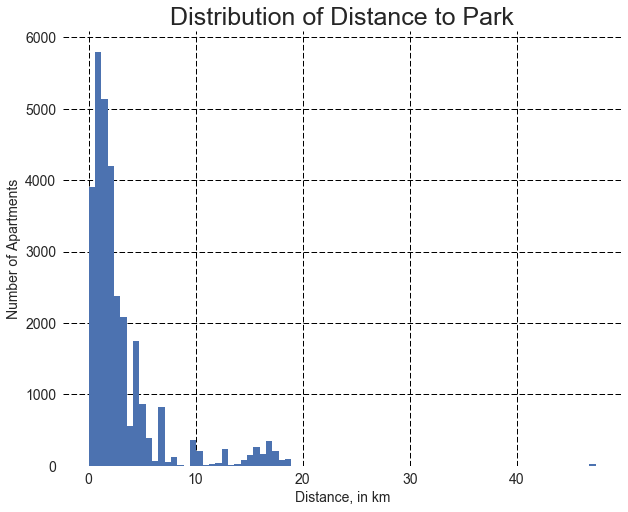

In [422]:
plt.figure(figsize = (10,8))
plt.hist(train_df[train_df.park_km.notnull()].park_km, bins=80)
plt.title("Distribution of Distance to Park", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Distance, in km", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

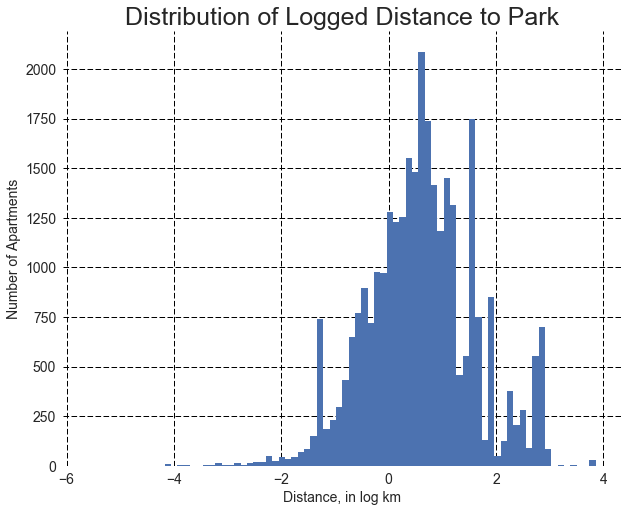

In [424]:
plt.figure(figsize = (10,8))
plt.hist(np.log(train_df[train_df.park_km > 0].park_km), bins=80)
plt.title("Distribution of Logged Distance to Park", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Distance, in log km", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

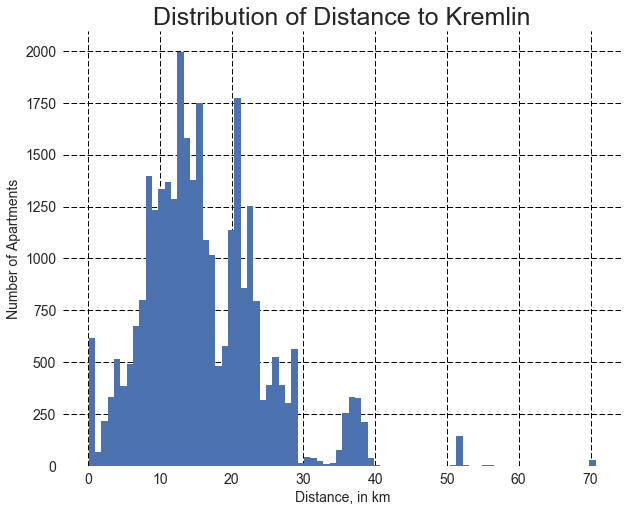

In [427]:
plt.figure(figsize = (10,8))
plt.hist(train_df[train_df.kremlin_km.notnull()].kremlin_km, bins=80)
plt.title("Distribution of Distance to Kremlin", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Distance, in km", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

#### COUNTS OF NEIGHBORHOOD FEATURES

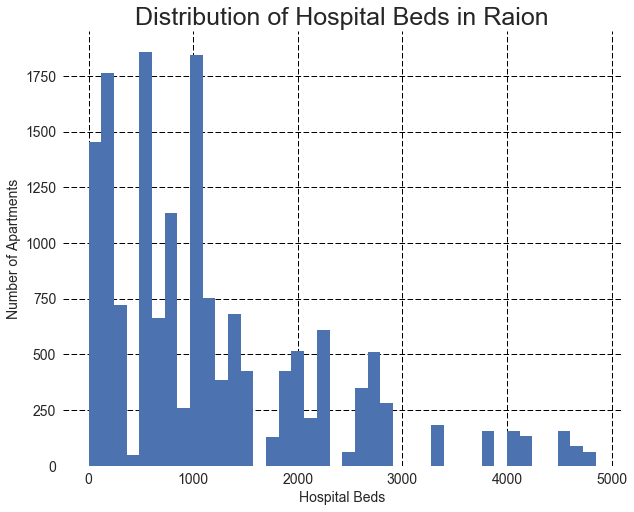

In [431]:
plt.figure(figsize = (10,8))
plt.hist(train_df[train_df.hospital_beds_raion.notnull()].hospital_beds_raion, bins=40)
plt.title("Distribution of Hospital Beds in Raion", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Hospital Beds", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

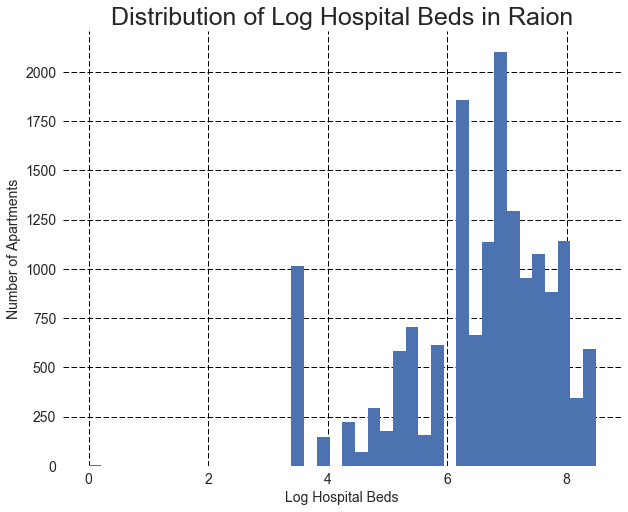

In [433]:
plt.figure(figsize = (10,8))
plt.hist(np.log1p(train_df[train_df.hospital_beds_raion.notnull()].hospital_beds_raion), bins=40)
plt.title("Distribution of Log Hospital Beds in Raion", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Log Hospital Beds", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

#### POPULATION IN MUNICIPALITY

In [436]:
train_df.full_all.describe()

count    3.047100e+04
mean     1.463062e+05
std      2.830251e+05
min      2.546000e+03
25%      2.817900e+04
50%      8.521900e+04
75%      1.251110e+05
max      1.716730e+06
Name: full_all, dtype: float64

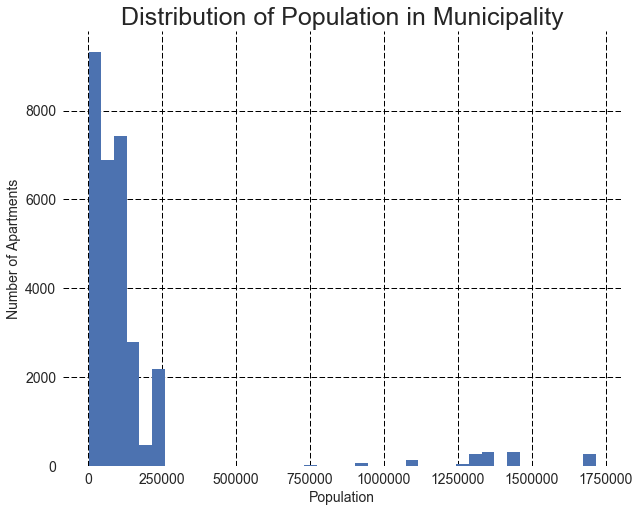

In [435]:
plt.figure(figsize = (10,8))
plt.hist(train_df[train_df.full_all.notnull()].full_all, bins=40)
plt.title("Distribution of Population in Municipality", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Population", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

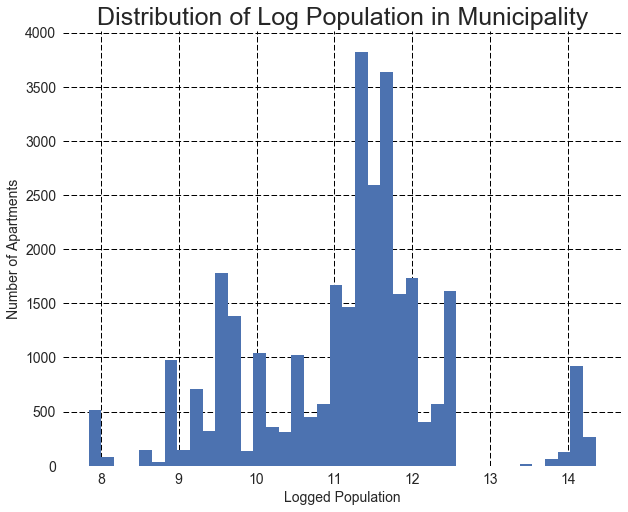

In [438]:
plt.figure(figsize = (10,8))
plt.hist(np.log(train_df[train_df.full_all.notnull()].full_all), bins=40)
plt.title("Distribution of Log Population in Municipality", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Logged Population", fontsize=14)
#setting an upper bound on values for this plot
#plt.xlim(0,40000000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

#### SUB-AREA

In [44]:
train_df.sub_area.unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe', 'Lefortovo',
       "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo", 'Vnukovo',
       'Juzhnoe Tushino', 'Severnoe Tushino', "Chertanovo Central'noe",
       'Fili Davydkovo', 'Otradnoe', 'Novo-Peredelkino', 'Bogorodskoe',
       'Jaroslavskoe', 'Strogino', 'Hovrino', "Moskvorech'e-Saburovo",
       'Staroe Krjukovo', 'Ljublino', 'Caricyno', 'Veshnjaki',
       'Danilovskoe', 'Preobrazhenskoe', "Kon'kovo", 'Brateevo',
       'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino', 'Donskoe',
       'Novogireevo', 'Juzhnoe Butovo', 'Sokol', 'Kurkino', 'Izmajlovo',
       'Severnoe Medvedkovo', 'Rostokino', 'Orehovo-Borisovo Severnoe',
       'Ochakovo-Matveevskoe', 'Taganskoe', 'Dmitrovskoe',
       'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan', 'Babushkinskoe',
       'Pokrovskoe Streshnevo', 'Obruc

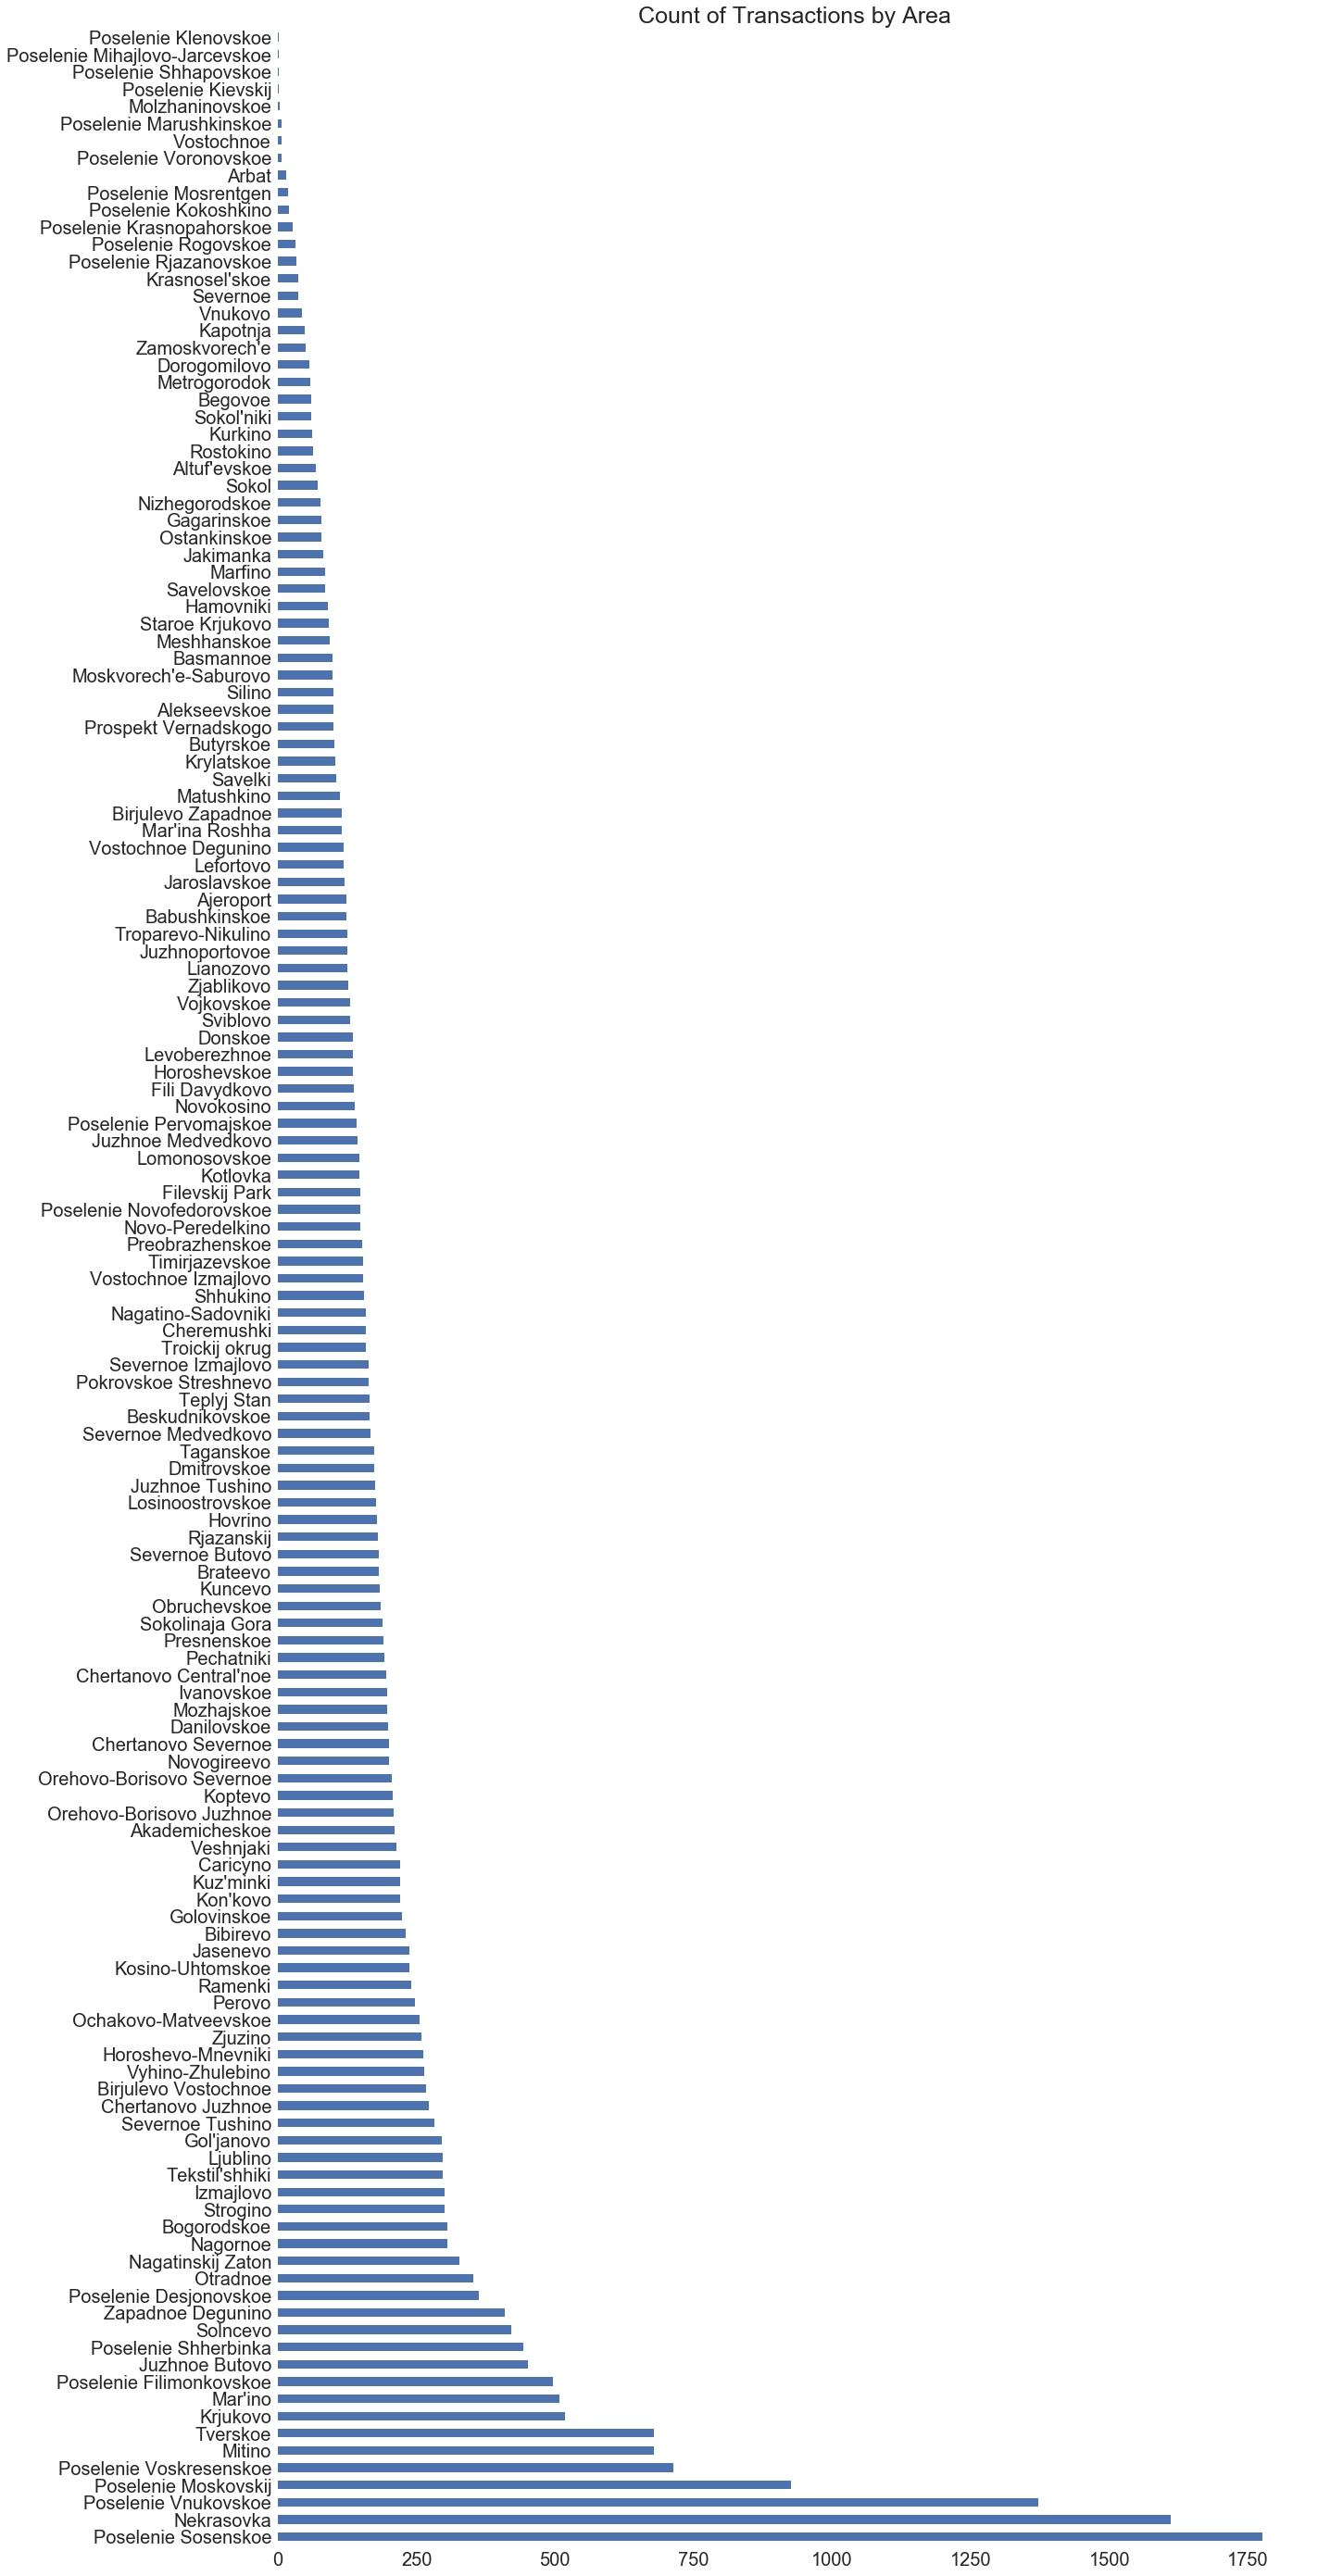

In [379]:
plt.figure(figsize=(20,50))
train_df.sub_area.value_counts().plot(kind='barh')
plt.title("Count of Transactions by Area", fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(b=False)
plt.show()

#### MATERIAL

In [45]:
train_df.material.unique()

array([ nan,   1.,   2.,   4.,   6.,   5.,   3.])

In [46]:
train_df.material.value_counts(dropna=False)

 1.0    14197
NaN      9572
 2.0     2993
 5.0     1561
 4.0     1344
 6.0      803
 3.0        1
Name: material, dtype: int64

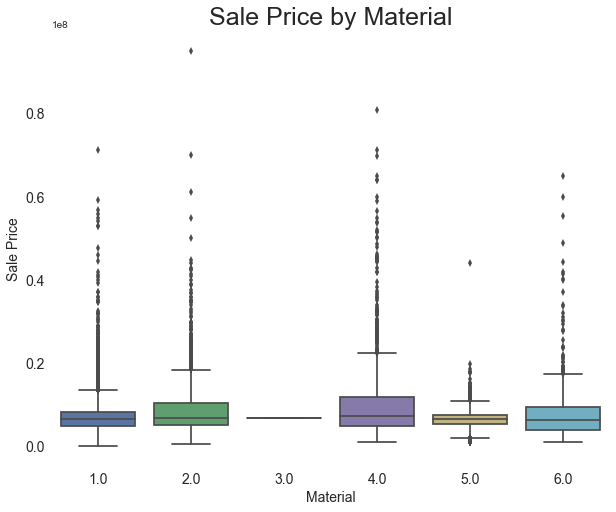

In [132]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=train_df.material, y=train_df.price_doc, ax=ax)
plt.title("Sale Price by Material", fontsize=25)
plt.ylabel("Sale Price", fontsize=14)
plt.xlabel("Material", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=False)
plt.show()

#### PRODUCT TYPE

In [47]:
train_df.product_type.unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

In [80]:
train_df.product_type.value_counts(dropna=False)

Investment       19448
OwnerOccupier    11023
Name: product_type, dtype: int64

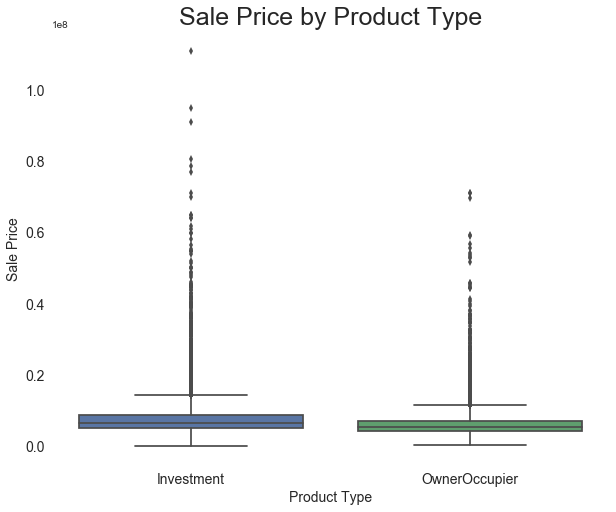

In [143]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=train_df.product_type, y=train_df.price_doc, ax=ax)
plt.title("Sale Price by Product Type", fontsize=25)
plt.ylabel("Sale Price", fontsize=14)
plt.xlabel("Product Type", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=False)
plt.show()

#### FLOOR AND MAX FLOOR

In [49]:
train_df.floor.unique()

array([  4.,   3.,   2.,   9.,  14.,  10.,   5.,  12.,  11.,  15.,   7.,
         6.,  24.,   1.,   8.,  16.,  17.,  13.,  20.,  18.,  nan,  21.,
        23.,  19.,  22.,  26.,  25.,  29.,  32.,  27.,  30.,  44.,   0.,
        28.,  38.,  34.,  33.,  37.,  31.,  36.,  41.,  77.])

In [50]:
train_df.max_floor.unique()

array([  nan,   17.,    5.,   22.,   16.,    9.,    8.,    0.,   24.,
          1.,    6.,   10.,   25.,   14.,   12.,   18.,   23.,   20.,
          7.,    4.,   30.,   11.,    3.,   40.,    2.,   32.,   15.,
         27.,   21.,   19.,   28.,   29.,   13.,   39.,   38.,   31.,
         26.,   37.,   33.,   47.,   36.,   34.,   48.,   42.,   45.,
         99.,   57.,   44.,  117.,   41.])

In [51]:
train_df.max_floor.value_counts()

17.0     4672
9.0      3025
5.0      2267
12.0     2229
14.0     1362
16.0     1146
1.0       973
22.0      745
25.0      735
0.0       550
24.0      396
8.0       307
10.0      284
3.0       278
4.0       278
15.0      239
19.0      220
20.0      204
18.0      195
6.0       148
7.0       116
2.0       100
23.0       94
21.0       57
13.0       56
11.0       54
30.0       42
40.0       25
32.0       17
27.0       17
28.0       10
26.0       10
37.0        7
48.0        7
29.0        6
39.0        4
99.0        3
31.0        3
34.0        3
33.0        3
36.0        2
47.0        2
45.0        2
117.0       1
41.0        1
44.0        1
57.0        1
38.0        1
42.0        1
Name: max_floor, dtype: int64

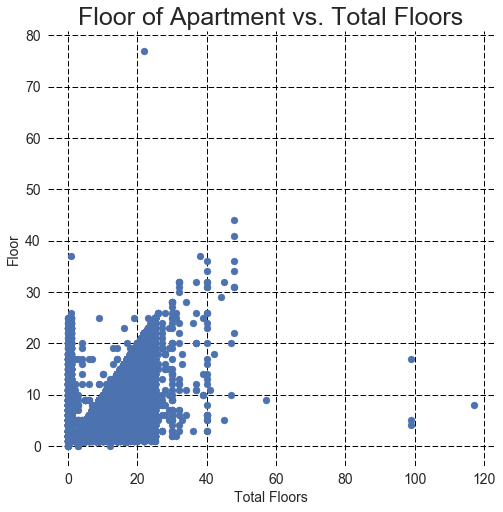

In [159]:
plt.figure(figsize = (8,8))
plt.scatter(train_df.max_floor, train_df.floor)
plt.title("Floor of Apartment vs. Total Floors", fontsize=25)
plt.ylabel("Floor", fontsize=14)
plt.xlabel("Total Floors", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

In [167]:
#check how often floor of apartment exceeds total floors in building
print "Number of transactions with floor exceding total floors: ", train_df[train_df.max_floor < train_df.floor][['max_floor','floor']].shape[0]
print "Total number of transactions in train data: ", train_df.shape[0]
print "Percent of transactions with floor exceeding total floors: ", train_df[train_df.max_floor < train_df.floor][['max_floor','floor']].shape[0] / float(train_df.shape[0])

Number of transactions with floor exceding total floors:  1493
Total number of transactions in train data:  30471
Percent of transactions with floor exceeding total floors:  0.0489974073709


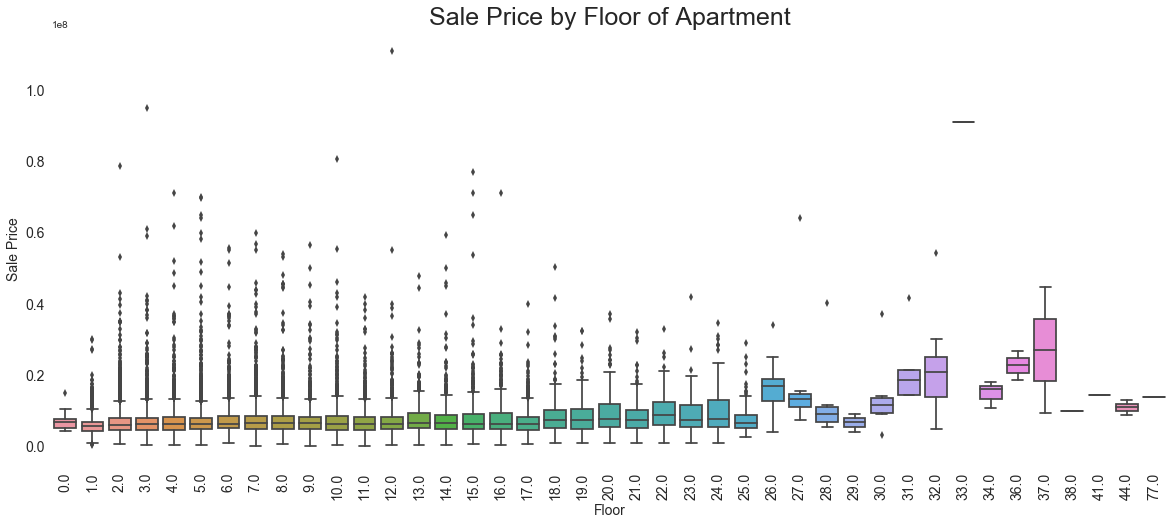

In [142]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=train_df.floor, y=train_df.price_doc, ax=ax)
plt.title("Sale Price by Floor of Apartment", fontsize=25)
plt.ylabel("Sale Price", fontsize=14)
plt.xlabel("Floor", fontsize=14)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.grid(b=False)
plt.show()

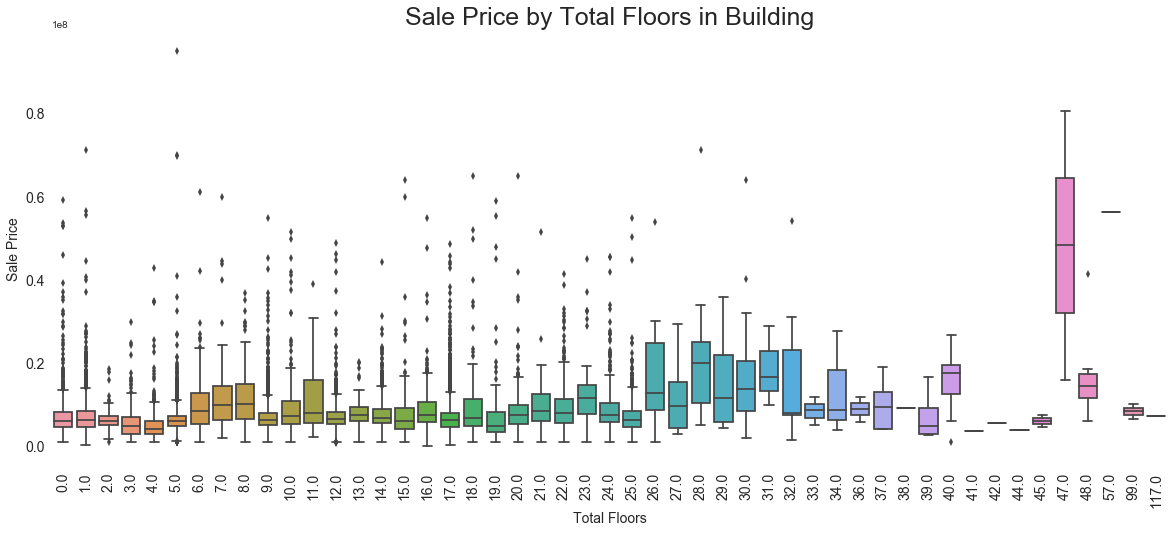

In [157]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=train_df.max_floor, y=train_df.price_doc, ax=ax)
plt.title("Sale Price by Total Floors in Building", fontsize=25)
plt.ylabel("Sale Price", fontsize=14)
plt.xlabel("Total Floors", fontsize=14)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.grid(b=False)
plt.show()

#### YEAR BUILT

In [401]:
train_df.build_year.value_counts(dropna=False)

NaN            13605
 2014.0          919
 2015.0          824
 0.0             530
 2013.0          464
 1970.0          418
 1969.0          407
 1968.0          389
 1967.0          384
 1965.0          378
 2016.0          375
 1.0             368
 1972.0          360
 1974.0          357
 1971.0          352
 1966.0          348
 1960.0          344
 1962.0          338
 1973.0          333
 1963.0          325
 1964.0          315
 1975.0          309
 1961.0          297
 1976.0          263
 1977.0          260
 2006.0          242
 1979.0          236
 1978.0          235
 2008.0          234
 2012.0          233
               ...  
 1912.0            5
 1947.0            4
 1924.0            3
 1914.0            3
 1949.0            3
 3.0               2
 1946.0            2
 1896.0            2
 1860.0            2
 1941.0            2
 1943.0            2
 1900.0            2
 1907.0            2
 1904.0            1
 1920.0            1
 1691.0            1
 1906.0      

#### NUMBER OF ROOMS

In [54]:
train_df.num_room.unique()

array([ nan,   2.,   1.,   3.,   4.,   5.,   6.,   0.,  19.,  10.,   8.,
         7.,  17.,   9.])

In [393]:
train_df.num_room.value_counts(dropna=False)

NaN      9572
 2.0     8132
 1.0     7602
 3.0     4675
 4.0      418
 5.0       40
 0.0       14
 6.0        9
 8.0        3
 10.0       2
 7.0        1
 19.0       1
 9.0        1
 17.0       1
Name: num_room, dtype: int64

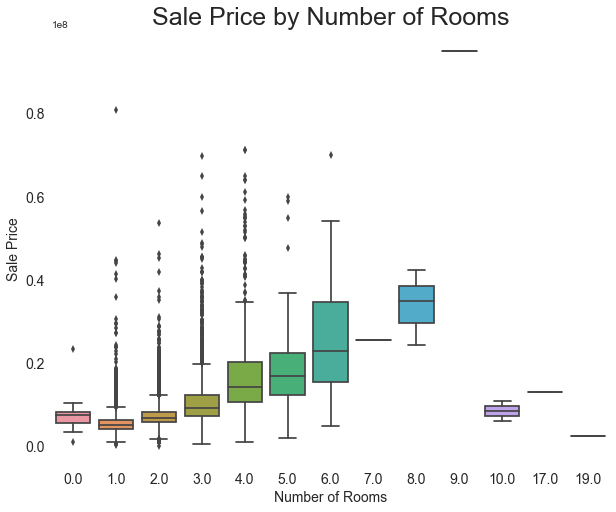

In [141]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=train_df.num_room, y=train_df.price_doc, ax=ax)
plt.title("Sale Price by Number of Rooms", fontsize=25)
plt.ylabel("Sale Price", fontsize=14)
plt.xlabel("Number of Rooms", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=False)
plt.show()

#### AREA/SIZE FEATURES

In [56]:
train_df[['full_sq','life_sq','kitch_sq']].describe().T

,count,mean,std,min,25%,50%,75%,max
full_sq,30471.0,54.214269,38.031487,0.0,38.0,49.0,63.0,5326.0
life_sq,24088.0,34.403271,52.285733,0.0,20.0,30.0,43.0,7478.0
kitch_sq,20899.0,6.399301,28.265979,0.0,1.0,6.0,9.0,2014.0


In [57]:
#CHECK FOR PRESENCE OF MISSING VALUES AMONG SQUARE FOOTAGE FEATURES
train_df[['full_sq','life_sq','kitch_sq']].isnull().sum()

full_sq        0
life_sq     6383
kitch_sq    9572
dtype: int64

In [58]:
#CHECK FOR PRESENCE OF ZERO VALUES AMONG SQUARE FOOTAGE FEATURES
zero_vls_sqft = pd.DataFrame(train_df[['full_sq','life_sq','kitch_sq']].astype(bool).sum(axis=0).sort_values(ascending=True), columns=['Count'])
zero_vls_sqft['Percent'] = zero_vls_sqft['Count'].apply(lambda x: '{:.2f}%'.format((train_df.shape[0] - float(x)) / train_df.shape[0] * 100))
zero_vls_sqft['Count'] = train_df.shape[0] - zero_vls_sqft['Count']
zero_vls_sqft[zero_vls_sqft.Count > 0]

,Count,Percent
kitch_sq,1381,4.53%
life_sq,45,0.15%
full_sq,2,0.01%


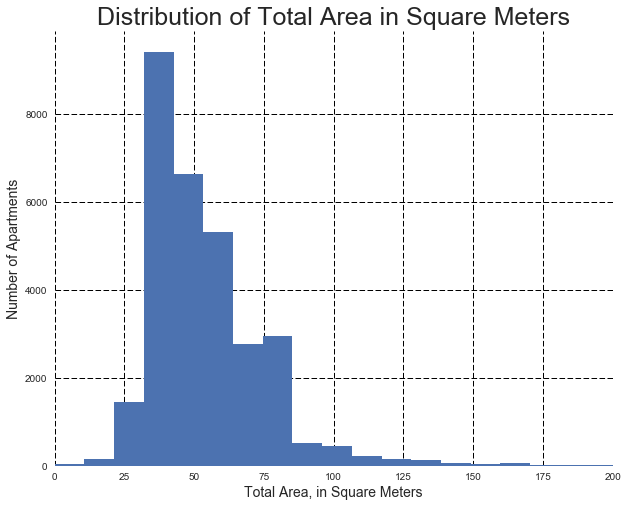

In [133]:
plt.figure(figsize = (10,8))
plt.hist(train_df.full_sq, bins=500)
plt.title("Distribution of Total Area in Square Meters", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Total Area, in Square Meters", fontsize=14)
#set upper bound on area values in this plot
plt.xlim(0,200)
plt.show()

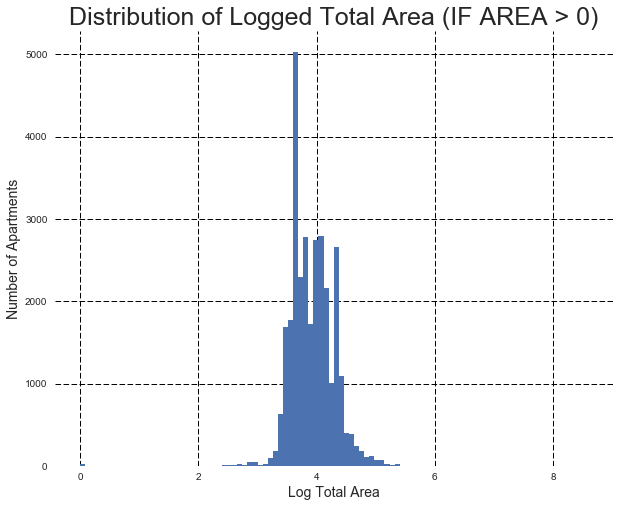

In [391]:
plt.figure(figsize = (10,8))
plt.hist(np.log(train_df[train_df.full_sq > 0].full_sq), bins=100)
plt.title("Distribution of Logged Total Area (IF AREA > 0)", fontsize=25)
plt.ylabel("Number of Apartments", fontsize=14)
plt.xlabel("Log Total Area", fontsize=14)
plt.show()

In [392]:
#check other area features for properties with 0 total area values
train_df[train_df.full_sq == 0][['life_sq','kitch_sq']]

,life_sq,kitch_sq
17932,0.0,0.0
24296,77.0,0.0


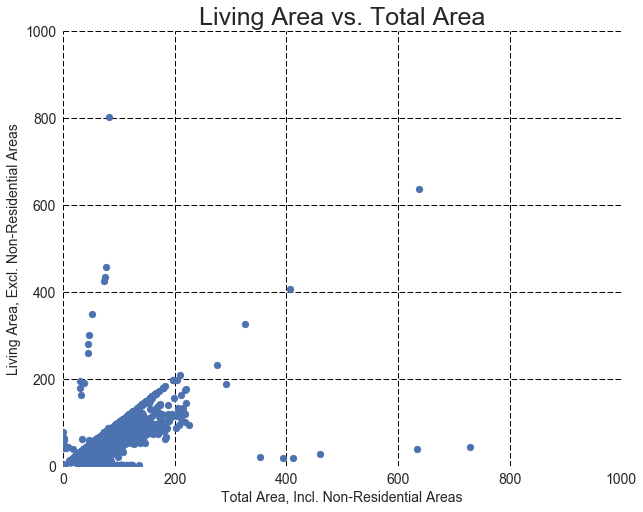

In [155]:
plt.figure(figsize = (10,8))
plt.scatter(train_df.full_sq, train_df.life_sq)
plt.title("Living Area vs. Total Area", fontsize=25)
plt.ylabel("Living Area, Excl. Non-Residential Areas", fontsize=14)
plt.xlabel("Total Area, Incl. Non-Residential Areas", fontsize=14)
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

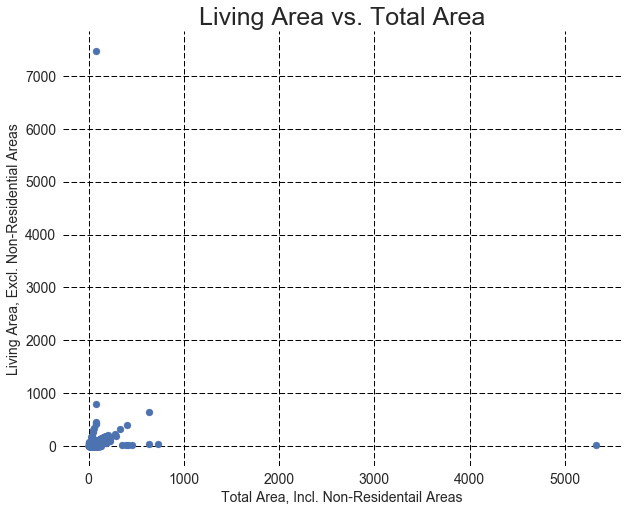

In [153]:
plt.figure(figsize = (10,8))
plt.scatter(train_df.full_sq, train_df.life_sq)
plt.title("Living Area vs. Total Area", fontsize=25)
plt.ylabel("Living Area, Excl. Non-Residential Areas", fontsize=14)
plt.xlabel("Total Area, Incl. Non-Residentail Areas", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

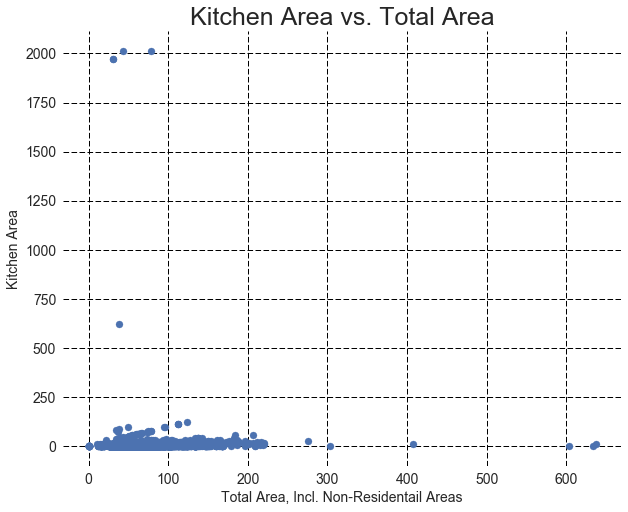

In [152]:
plt.figure(figsize = (10,8))
plt.scatter(train_df.full_sq, train_df.kitch_sq)
plt.title("Kitchen Area vs. Total Area", fontsize=25)
plt.ylabel("Kitchen Area", fontsize=14)
plt.xlabel("Total Area, Incl. Non-Residentail Areas", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

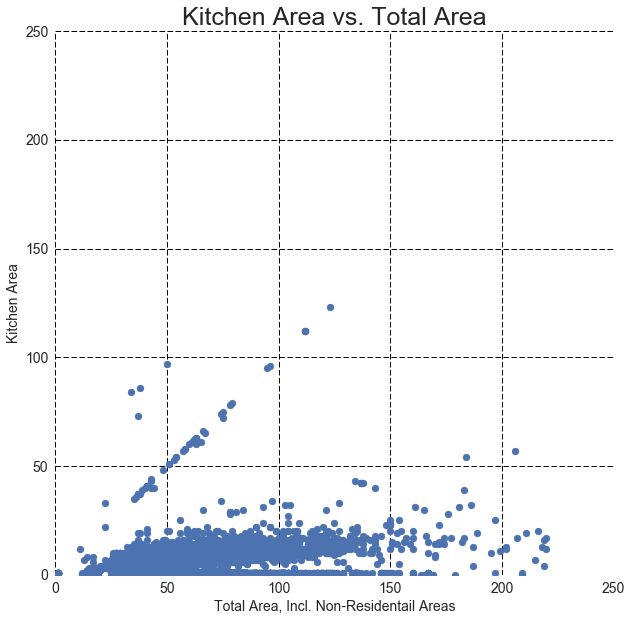

In [151]:
plt.figure(figsize = (10,10))
plt.scatter(train_df.full_sq, train_df.kitch_sq)
plt.title("Kitchen Area vs. Total Area", fontsize=25)
plt.ylabel("Kitchen Area", fontsize=14)
plt.xlabel("Total Area, Incl. Non-Residentail Areas", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.xlim(0,250)
plt.ylim(0,250)
plt.show()

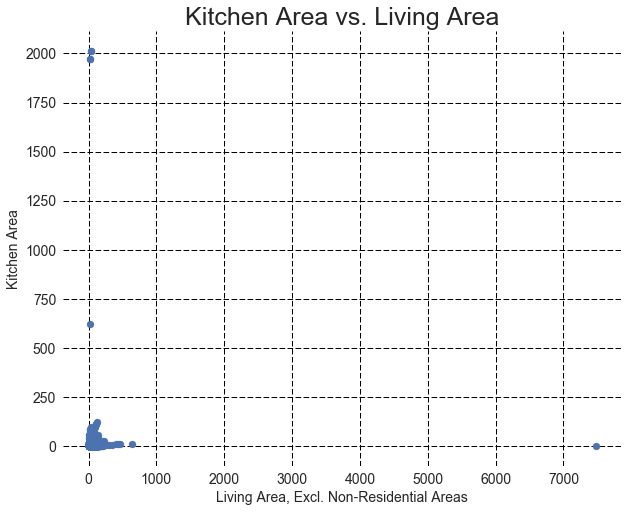

In [150]:
plt.figure(figsize = (10,8))
plt.scatter(train_df.life_sq, train_df.kitch_sq)
plt.title("Kitchen Area vs. Living Area", fontsize=25)
plt.ylabel("Kitchen Area", fontsize=14)
plt.xlabel("Living Area, Excl. Non-Residential Areas", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

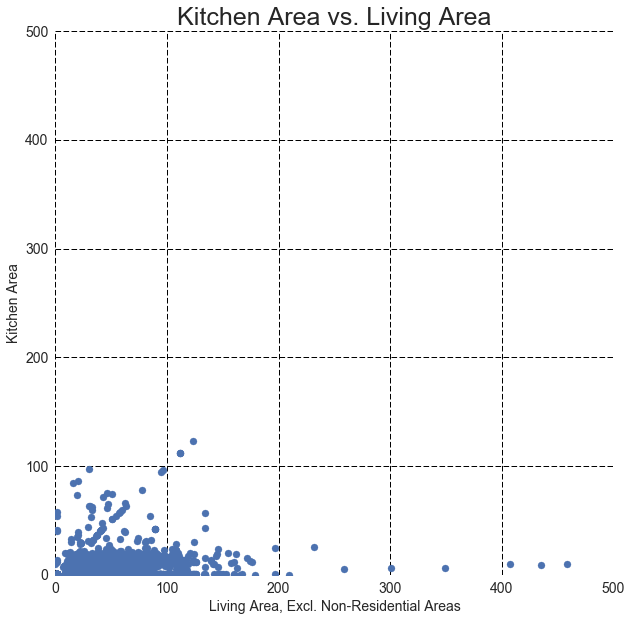

In [149]:
plt.figure(figsize = (10,10))
plt.scatter(train_df.life_sq, train_df.kitch_sq)
plt.title("Kitchen Area vs. Living Area", fontsize=25)
plt.ylabel("Kitchen Area", fontsize=14)
plt.xlabel("Living Area, Excl. Non-Residential Areas", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.xlim(0,500)
plt.ylim(0,500)
plt.show()

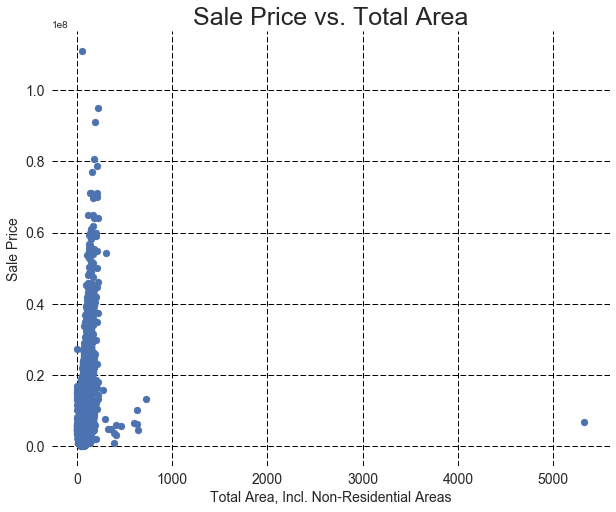

In [156]:
plt.figure(figsize = (10,8))
plt.scatter(train_df.full_sq, train_df.price_doc)
plt.title("Sale Price vs. Total Area", fontsize=25)
plt.ylabel("Sale Price", fontsize=14)
plt.xlabel("Total Area, Incl. Non-Residential Areas", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=True)
plt.show()

#### CONDITION/STATE

In [82]:
train_df.state.value_counts(dropna=False)

NaN      13559
 2.0      5844
 3.0      5790
 1.0      4855
 4.0       422
 33.0        1
Name: state, dtype: int64

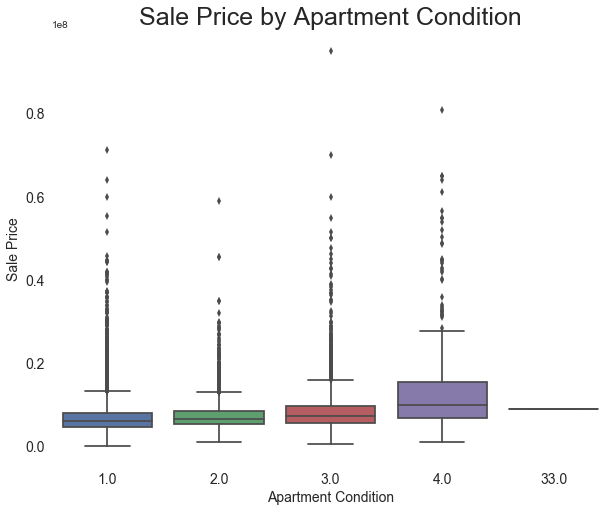

In [144]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x=train_df.state, y=train_df.price_doc, ax=ax)
plt.title("Sale Price by Apartment Condition", fontsize=25)
plt.ylabel("Sale Price", fontsize=14)
plt.xlabel("Apartment Condition", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(b=False)
plt.show()